In [1]:
import cv2
import os
import matplotlib.pyplot as plt


In [2]:
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

### 1. Setting up a Capture From Video

In [3]:
# setup & read video frame from squat video
cap = cv2.VideoCapture("C:/Users/rupik/Documents/Edu labs/Squat_Video.mp4")

In [4]:
# frab a frame from video
ret,frame = cap.read()

In [12]:
# Render thr frame 
# cv2.imshow('Frame',frame)


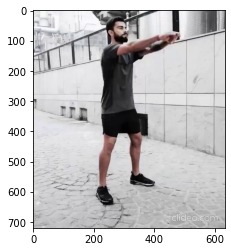

In [10]:
#convert bgr to rgb as opencv reads image in bgr format
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()


In [11]:
cap.release()

### Video Capture properties

In [13]:
cap = cv2.VideoCapture("C:/Users/rupik/Documents/Edu labs/Squat_Video.mp4")
cap.read()

(True,
 array([[[239, 239, 239],
         [237, 237, 237],
         [235, 235, 235],
         ...,
         [135, 132, 133],
         [137, 137, 137],
         [156, 156, 156]],
 
        [[239, 239, 239],
         [238, 238, 238],
         [235, 235, 235],
         ...,
         [142, 139, 140],
         [129, 129, 129],
         [147, 147, 147]],
 
        [[239, 239, 239],
         [238, 238, 238],
         [236, 236, 236],
         ...,
         [135, 132, 133],
         [115, 115, 115],
         [139, 139, 139]],
 
        ...,
 
        [[185, 182, 183],
         [187, 184, 185],
         [189, 186, 187],
         ...,
         [164, 164, 164],
         [161, 161, 161],
         [170, 170, 170]],
 
        [[184, 181, 182],
         [185, 182, 183],
         [188, 185, 186],
         ...,
         [164, 164, 164],
         [164, 164, 164],
         [172, 172, 172]],
 
        [[184, 181, 182],
         [184, 181, 182],
         [185, 182, 183],
         ...,
         [164, 164, 1

In [14]:
# Height of the frame
cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

720.0

In [15]:
# width of the frame
cap.get(cv2.CAP_PROP_FRAME_WIDTH)

634.0

In [16]:
# Get Number of frames
cap.get(cv2.CAP_PROP_FRAME_COUNT)

1888.0

In [17]:
# Get Frames per second
cap.get(cv2.CAP_PROP_FPS)

29.97002997002997

#### 3. Working with Video Captures 

In [24]:
cap = cv2.VideoCapture("C:/Users/rupik/Documents/Edu labs/Squat_Video.mp4")

#  Loop through each frame 
for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    ret,frame = cap.read()
    
    # Gray scale frame transform
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('video Player',frame)
    cv2.imshow('Gray',gray)
    
    k = cv2.waitKey(25) & 0xFF
    if k==ord('q') or k ==27:
        break
    
    
    
cap.release()
cv2.destroyAllWindows()

<img src = "https://google.github.io/mediapipe/images/mobile/pose_tracking_full_body_landmarks.png" style = "height:300px">

In [29]:
cap = cv2.VideoCapture('C:/Users/rupik/Documents/Edu labs/Squat_Video.mp4')
#setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    #loop through each frame
    for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret,frame = cap.read()

        # Gray scale frame transform
        image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        # read only image frame
        image.flags.writeable = False
        
        #make detection by using mediapipe
        results = pose.process(image)
        
        #extract the landmarks 
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        
        except:
            pass
        
        # Recolor image back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        
        # Detection
        #landmarks - dotted points
        # connections - lines
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(255,255,0), thickness=2, circle_radius=3),
                                 mp_drawing.DrawingSpec(color=(180,105,255), thickness=2, circle_radius=3))
        
        
        
        
        
        
        # Extract
        cv2.imshow('video Player',image)
        cv2.imshow('Gray',gray)

        k = cv2.waitKey(25) & 0xFF
        if k==ord('q') or k ==27:
            break
            
cap.release()
cv2.destroyAllWindows()

[x: 0.4801899492740631
y: 0.10130926966667175
z: -0.33141034841537476
visibility: 0.9999969005584717
, x: 0.4768170416355133
y: 0.08377289772033691
z: -0.2873726189136505
visibility: 0.9999957084655762
, x: 0.4788901209831238
y: 0.08385968208312988
z: -0.287274569272995
visibility: 0.999992847442627
, x: 0.4808601438999176
y: 0.08395597338676453
z: -0.28732889890670776
visibility: 0.9999932050704956
, x: 0.4637788236141205
y: 0.08381083607673645
z: -0.3246006667613983
visibility: 0.999997615814209
, x: 0.45659932494163513
y: 0.08401182293891907
z: -0.3245139718055725
visibility: 0.999997615814209
, x: 0.44845446944236755
y: 0.08450308442115784
z: -0.32445985078811646
visibility: 0.9999977350234985
, x: 0.46753937005996704
y: 0.09050777554512024
z: -0.06032342463731766
visibility: 0.9999896287918091
, x: 0.4239744544029236
y: 0.09393060207366943
z: -0.2308322936296463
visibility: 0.9999973773956299
, x: 0.4807567000389099
y: 0.1191469058394432
z: -0.24468597769737244
visibility: 0.99998

[x: 0.48356667160987854
y: 0.10508012026548386
z: -0.33670350909233093
visibility: 0.9999967813491821
, x: 0.4790458679199219
y: 0.08753861486911774
z: -0.2900940775871277
visibility: 0.9999954700469971
, x: 0.48096925020217896
y: 0.08763129264116287
z: -0.2900465130805969
visibility: 0.9999923706054688
, x: 0.48264482617378235
y: 0.0878177359700203
z: -0.2901093065738678
visibility: 0.9999926686286926
, x: 0.4669325649738312
y: 0.08781220763921738
z: -0.3211091458797455
visibility: 0.9999974966049194
, x: 0.4601633548736572
y: 0.08811096847057343
z: -0.32102444767951965
visibility: 0.9999974966049194
, x: 0.4524742662906647
y: 0.08853049576282501
z: -0.32099369168281555
visibility: 0.9999976754188538
, x: 0.4682721197605133
y: 0.09711413830518723
z: -0.05819198116660118
visibility: 0.9999890327453613
, x: 0.42758750915527344
y: 0.09871217608451843
z: -0.1959228813648224
visibility: 0.9999973177909851
, x: 0.4850117862224579
y: 0.1237543448805809
z: -0.2504595220088959
visibility: 0.99

[x: 0.49669408798217773
y: 0.1376468390226364
z: -0.328902006149292
visibility: 0.9999937415122986
, x: 0.49263280630111694
y: 0.123575359582901
z: -0.27153992652893066
visibility: 0.9999914765357971
, x: 0.4940808415412903
y: 0.12359611690044403
z: -0.27165451645851135
visibility: 0.9999864101409912
, x: 0.4953182339668274
y: 0.1235988587141037
z: -0.27174657583236694
visibility: 0.9999865889549255
, x: 0.4820961356163025
y: 0.12425252050161362
z: -0.30704161524772644
visibility: 0.9999948143959045
, x: 0.47569429874420166
y: 0.12481691688299179
z: -0.3069934844970703
visibility: 0.9999945759773254
, x: 0.4687044024467468
y: 0.12541812658309937
z: -0.30702701210975647
visibility: 0.9999945759773254
, x: 0.47913530468940735
y: 0.1326352208852768
z: -0.04021573066711426
visibility: 0.9999788999557495
, x: 0.44545891880989075
y: 0.13459345698356628
z: -0.19478242099285126
visibility: 0.9999942183494568
, x: 0.49692076444625854
y: 0.15408915281295776
z: -0.2396881878376007
visibility: 0.9

[x: 0.5106366276741028
y: 0.20658288896083832
z: -0.38407278060913086
visibility: 0.9999867677688599
, x: 0.5083802342414856
y: 0.1932847797870636
z: -0.3291836977005005
visibility: 0.9999842047691345
, x: 0.5109304189682007
y: 0.19303114712238312
z: -0.3293081521987915
visibility: 0.9999762773513794
, x: 0.5132219791412354
y: 0.19276690483093262
z: -0.32942256331443787
visibility: 0.9999768137931824
, x: 0.4951012432575226
y: 0.19361324608325958
z: -0.3668273389339447
visibility: 0.9999880790710449
, x: 0.4879415035247803
y: 0.19370624423027039
z: -0.3668258488178253
visibility: 0.9999873638153076
, x: 0.4804874658584595
y: 0.1940719336271286
z: -0.3668486177921295
visibility: 0.9999867081642151
, x: 0.4994312822818756
y: 0.19972820580005646
z: -0.08751367777585983
visibility: 0.9999650716781616
, x: 0.4595740735530853
y: 0.20207896828651428
z: -0.2516184449195862
visibility: 0.9999884366989136
, x: 0.5116462111473083
y: 0.22307510673999786
z: -0.2952030599117279
visibility: 0.9999487

[x: 0.5209384560585022
y: 0.2542208433151245
z: -0.32724034786224365
visibility: 0.9999872446060181
, x: 0.5154909491539001
y: 0.24088054895401
z: -0.276216983795166
visibility: 0.9999852180480957
, x: 0.5166736841201782
y: 0.24080468714237213
z: -0.27638745307922363
visibility: 0.9999787211418152
, x: 0.5177708864212036
y: 0.24075308442115784
z: -0.2765009105205536
visibility: 0.9999793767929077
, x: 0.5061056017875671
y: 0.24101358652114868
z: -0.3184935450553894
visibility: 0.9999880194664001
, x: 0.4999775290489197
y: 0.24116238951683044
z: -0.31848666071891785
visibility: 0.9999873638153076
, x: 0.49355193972587585
y: 0.24189752340316772
z: -0.3184712529182434
visibility: 0.9999865293502808
, x: 0.4998829960823059
y: 0.24865426123142242
z: -0.0709034651517868
visibility: 0.9999702572822571
, x: 0.46971333026885986
y: 0.2508350908756256
z: -0.2569357752799988
visibility: 0.9999889731407166
, x: 0.5211185216903687
y: 0.2702327370643616
z: -0.25190645456314087
visibility: 0.999956250

[x: 0.527492105960846
y: 0.2975409924983978
z: -0.3595235347747803
visibility: 0.9999884366989136
, x: 0.5227880477905273
y: 0.28226542472839355
z: -0.3119587004184723
visibility: 0.9999862313270569
, x: 0.5236654877662659
y: 0.2819010615348816
z: -0.3121458888053894
visibility: 0.9999815821647644
, x: 0.524531364440918
y: 0.28150978684425354
z: -0.31228986382484436
visibility: 0.9999822974205017
, x: 0.5142666101455688
y: 0.282763808965683
z: -0.35316696763038635
visibility: 0.9999878406524658
, x: 0.5086724162101746
y: 0.28287965059280396
z: -0.35318663716316223
visibility: 0.9999875426292419
, x: 0.5023908019065857
y: 0.28324729204177856
z: -0.3531765043735504
visibility: 0.9999864101409912
, x: 0.5080840587615967
y: 0.2884775698184967
z: -0.10940040647983551
visibility: 0.9999756217002869
, x: 0.4768272340297699
y: 0.2922514081001282
z: -0.29462796449661255
visibility: 0.9999887347221375
, x: 0.5278812050819397
y: 0.3130946457386017
z: -0.28437697887420654
visibility: 0.99996531009

[x: 0.5320890545845032
y: 0.3375265598297119
z: -0.4837586283683777
visibility: 0.9999867677688599
, x: 0.5276393890380859
y: 0.3229281008243561
z: -0.4359363913536072
visibility: 0.9999841451644897
, x: 0.5286917686462402
y: 0.3226776123046875
z: -0.4361022114753723
visibility: 0.9999803900718689
, x: 0.5297848582267761
y: 0.32238075137138367
z: -0.43628156185150146
visibility: 0.9999821186065674
, x: 0.5185585618019104
y: 0.3236040472984314
z: -0.4742400348186493
visibility: 0.9999848008155823
, x: 0.5128403902053833
y: 0.3241235613822937
z: -0.4743005335330963
visibility: 0.9999845623970032
, x: 0.5062071084976196
y: 0.32493656873703003
z: -0.47429439425468445
visibility: 0.9999832510948181
, x: 0.5141878128051758
y: 0.33015549182891846
z: -0.22733162343502045
visibility: 0.999976634979248
, x: 0.480651319026947
y: 0.33418065309524536
z: -0.39869484305381775
visibility: 0.9999834895133972
, x: 0.5334699749946594
y: 0.3526909053325653
z: -0.407365620136261
visibility: 0.9999678730964

[x: 0.5335015654563904
y: 0.3452712893486023
z: -0.49516984820365906
visibility: 0.9999853372573853
, x: 0.5291661024093628
y: 0.32935652136802673
z: -0.4488943815231323
visibility: 0.9999814629554749
, x: 0.5303518176078796
y: 0.3291025161743164
z: -0.4490469992160797
visibility: 0.9999779462814331
, x: 0.5314446687698364
y: 0.3288757801055908
z: -0.4492228329181671
visibility: 0.9999805092811584
, x: 0.5196807980537415
y: 0.3296533226966858
z: -0.487007737159729
visibility: 0.9999825358390808
, x: 0.5131796002388
y: 0.32994160056114197
z: -0.4870907664299011
visibility: 0.9999827146530151
, x: 0.5059107542037964
y: 0.33053451776504517
z: -0.48710131645202637
visibility: 0.9999818205833435
, x: 0.5165238380432129
y: 0.3343057930469513
z: -0.2410775125026703
visibility: 0.9999752640724182
, x: 0.48144951462745667
y: 0.33809587359428406
z: -0.4106540083885193
visibility: 0.9999809265136719
, x: 0.5341470837593079
y: 0.3620639443397522
z: -0.4182724952697754
visibility: 0.999967396259307

[x: 0.5304745435714722
y: 0.32445698976516724
z: -0.37325161695480347
visibility: 0.9999794363975525
, x: 0.5245362520217896
y: 0.3101932406425476
z: -0.3261774480342865
visibility: 0.9999739527702332
, x: 0.5253889560699463
y: 0.309709370136261
z: -0.3263736665248871
visibility: 0.9999706745147705
, x: 0.5261850953102112
y: 0.30935361981391907
z: -0.32655099034309387
visibility: 0.9999746084213257
, x: 0.5165786147117615
y: 0.3118096590042114
z: -0.3646467328071594
visibility: 0.9999748468399048
, x: 0.5107723474502563
y: 0.3122231066226959
z: -0.36467960476875305
visibility: 0.9999750256538391
, x: 0.5042397379875183
y: 0.31286191940307617
z: -0.3646923005580902
visibility: 0.9999739527702332
, x: 0.5077324509620667
y: 0.3150936961174011
z: -0.12226435542106628
visibility: 0.9999694228172302
, x: 0.48079192638397217
y: 0.3213920295238495
z: -0.2919095754623413
visibility: 0.9999710321426392
, x: 0.530220091342926
y: 0.34066128730773926
z: -0.2979273498058319
visibility: 0.99996048212

[x: 0.5261223316192627
y: 0.26476505398750305
z: -0.36973077058792114
visibility: 0.9999757409095764
, x: 0.5212936997413635
y: 0.2494124472141266
z: -0.32344546914100647
visibility: 0.9999690055847168
, x: 0.522114634513855
y: 0.24919255077838898
z: -0.32368654012680054
visibility: 0.9999649524688721
, x: 0.5228412747383118
y: 0.24891899526119232
z: -0.3238634467124939
visibility: 0.9999688863754272
, x: 0.5128097534179688
y: 0.25030532479286194
z: -0.36360204219818115
visibility: 0.9999692440032959
, x: 0.5074154138565063
y: 0.2510530352592468
z: -0.3635990619659424
visibility: 0.9999696612358093
, x: 0.5014885067939758
y: 0.25224781036376953
z: -0.3636080324649811
visibility: 0.9999681711196899
, x: 0.504389226436615
y: 0.2569843828678131
z: -0.11910891532897949
visibility: 0.9999632239341736
, x: 0.4775764048099518
y: 0.2627904713153839
z: -0.2957812249660492
visibility: 0.9999662637710571
, x: 0.5257400274276733
y: 0.28365668654441833
z: -0.2942158877849579
visibility: 0.999954700

[x: 0.519009530544281
y: 0.22046729922294617
z: -0.3816433846950531
visibility: 0.9999788999557495
, x: 0.5135682821273804
y: 0.20527061820030212
z: -0.33939671516418457
visibility: 0.9999732375144958
, x: 0.5143541693687439
y: 0.20501668751239777
z: -0.33958205580711365
visibility: 0.9999696016311646
, x: 0.5151147246360779
y: 0.2048366367816925
z: -0.33974650502204895
visibility: 0.9999727606773376
, x: 0.5053658485412598
y: 0.20600023865699768
z: -0.38205716013908386
visibility: 0.999972939491272
, x: 0.49991878867149353
y: 0.206242173910141
z: -0.3820587396621704
visibility: 0.9999731183052063
, x: 0.49411049485206604
y: 0.20700965821743011
z: -0.38203850388526917
visibility: 0.9999716877937317
, x: 0.4964522123336792
y: 0.2122955173254013
z: -0.1413150578737259
visibility: 0.9999685883522034
, x: 0.4694317877292633
y: 0.2162214070558548
z: -0.3289518654346466
visibility: 0.9999715089797974
, x: 0.5177801847457886
y: 0.23791760206222534
z: -0.3080608546733856
visibility: 0.99996089

[x: 0.5029565095901489
y: 0.15095670521259308
z: -0.35683947801589966
visibility: 0.9999817609786987
, x: 0.4977729916572571
y: 0.13580645620822906
z: -0.3101029098033905
visibility: 0.9999759793281555
, x: 0.49877631664276123
y: 0.13599880039691925
z: -0.31024229526519775
visibility: 0.9999714493751526
, x: 0.49968600273132324
y: 0.13622117042541504
z: -0.3103696405887604
visibility: 0.9999730587005615
, x: 0.48899248242378235
y: 0.13629020750522614
z: -0.35103335976600647
visibility: 0.9999771118164062
, x: 0.4833953082561493
y: 0.13654714822769165
z: -0.3509902358055115
visibility: 0.9999769926071167
, x: 0.4775678813457489
y: 0.13688033819198608
z: -0.35094183683395386
visibility: 0.9999752640724182
, x: 0.4789394438266754
y: 0.1462852954864502
z: -0.09508050233125687
visibility: 0.9999693036079407
, x: 0.453198105096817
y: 0.1476416140794754
z: -0.27667030692100525
visibility: 0.9999769926071167
, x: 0.5013266205787659
y: 0.1683708280324936
z: -0.2761746346950531
visibility: 0.999

[x: 0.48682108521461487
y: 0.11414039134979248
z: -0.31249457597732544
visibility: 0.9999840259552002
, x: 0.48383262753486633
y: 0.09903556108474731
z: -0.2596651613712311
visibility: 0.9999785423278809
, x: 0.48562049865722656
y: 0.09889496862888336
z: -0.25972822308540344
visibility: 0.9999729990959167
, x: 0.48721620440483093
y: 0.09890516847372055
z: -0.2597719728946686
visibility: 0.9999737739562988
, x: 0.4726598560810089
y: 0.09985853731632233
z: -0.3048176169395447
visibility: 0.9999814629554749
, x: 0.465851366519928
y: 0.10019244998693466
z: -0.3047659695148468
visibility: 0.9999812245368958
, x: 0.45885103940963745
y: 0.10052844136953354
z: -0.30473431944847107
visibility: 0.9999796152114868
, x: 0.47139039635658264
y: 0.10607210546731949
z: -0.018417244777083397
visibility: 0.9999681711196899
, x: 0.43494749069213867
y: 0.10809338837862015
z: -0.2187241017818451
visibility: 0.9999820590019226
, x: 0.48536089062690735
y: 0.13260787725448608
z: -0.2222779095172882
visibility

[x: 0.4774746596813202
y: 0.09695972502231598
z: -0.35431528091430664
visibility: 0.9999887347221375
, x: 0.47431012988090515
y: 0.08075413107872009
z: -0.29453372955322266
visibility: 0.9999847412109375
, x: 0.476583868265152
y: 0.08077409863471985
z: -0.29470309615135193
visibility: 0.9999793171882629
, x: 0.47862735390663147
y: 0.0808279886841774
z: -0.2947968542575836
visibility: 0.9999796748161316
, x: 0.46176984906196594
y: 0.08038415014743805
z: -0.34146228432655334
visibility: 0.9999878406524658
, x: 0.4546358585357666
y: 0.08013585209846497
z: -0.34138980507850647
visibility: 0.9999876618385315
, x: 0.44724544882774353
y: 0.07992593199014664
z: -0.3414989709854126
visibility: 0.9999867081642151
, x: 0.46373775601387024
y: 0.0886322632431984
z: -0.045537080615758896
visibility: 0.9999738335609436
, x: 0.4227485954761505
y: 0.08754624426364899
z: -0.2554769515991211
visibility: 0.9999884963035583
, x: 0.4784426987171173
y: 0.11487824469804764
z: -0.26013854146003723
visibility: 

[x: 0.47458121180534363
y: 0.09460481256246567
z: -0.36673787236213684
visibility: 0.999988853931427
, x: 0.47032690048217773
y: 0.07760395109653473
z: -0.3123507499694824
visibility: 0.9999845027923584
, x: 0.4726172089576721
y: 0.0775972306728363
z: -0.312375545501709
visibility: 0.999977171421051
, x: 0.47464779019355774
y: 0.07767168432474136
z: -0.31244829297065735
visibility: 0.999977707862854
, x: 0.4577341675758362
y: 0.07761560380458832
z: -0.3623856008052826
visibility: 0.9999890923500061
, x: 0.4505879878997803
y: 0.0776301920413971
z: -0.3623311519622803
visibility: 0.9999890327453613
, x: 0.4430869221687317
y: 0.07785482704639435
z: -0.3623691499233246
visibility: 0.9999882578849792
, x: 0.45899292826652527
y: 0.08541011065244675
z: -0.0537339523434639
visibility: 0.9999690055847168
, x: 0.4186815321445465
y: 0.08660390973091125
z: -0.2833649516105652
visibility: 0.9999901056289673
, x: 0.4765358865261078
y: 0.1117015928030014
z: -0.26946645975112915
visibility: 0.99995875

[x: 0.47408437728881836
y: 0.09064338356256485
z: -0.35340458154678345
visibility: 0.9999881982803345
, x: 0.4684796631336212
y: 0.07357753068208694
z: -0.30381742119789124
visibility: 0.9999829530715942
, x: 0.470146119594574
y: 0.07360457628965378
z: -0.3038354814052582
visibility: 0.9999724626541138
, x: 0.4715994894504547
y: 0.0737365335226059
z: -0.30388835072517395
visibility: 0.9999732971191406
, x: 0.4564323425292969
y: 0.07328531891107559
z: -0.3549363911151886
visibility: 0.9999895691871643
, x: 0.44978371262550354
y: 0.07319112122058868
z: -0.3548785150051117
visibility: 0.9999895691871643
, x: 0.44256672263145447
y: 0.07328886538743973
z: -0.3549128770828247
visibility: 0.9999891519546509
, x: 0.45400482416152954
y: 0.0817752480506897
z: -0.05832209438085556
visibility: 0.9999587535858154
, x: 0.4167371690273285
y: 0.0831487700343132
z: -0.2880920171737671
visibility: 0.9999909996986389
, x: 0.4755774736404419
y: 0.10731416195631027
z: -0.26046469807624817
visibility: 0.999

[x: 0.47420796751976013
y: 0.09315292537212372
z: -0.35707777738571167
visibility: 0.9999895095825195
, x: 0.4689631760120392
y: 0.07664351910352707
z: -0.3042939305305481
visibility: 0.999984860420227
, x: 0.4707099199295044
y: 0.07661128789186478
z: -0.30428460240364075
visibility: 0.9999749064445496
, x: 0.4722452163696289
y: 0.07663340121507645
z: -0.30430397391319275
visibility: 0.9999754428863525
, x: 0.45650047063827515
y: 0.07629425078630447
z: -0.35141685605049133
visibility: 0.9999911189079285
, x: 0.44975751638412476
y: 0.0760326087474823
z: -0.3513472080230713
visibility: 0.9999911189079285
, x: 0.4422304630279541
y: 0.07581976801156998
z: -0.3513422906398773
visibility: 0.9999907612800598
, x: 0.45541054010391235
y: 0.08398155868053436
z: -0.04763619601726532
visibility: 0.9999595880508423
, x: 0.4162996709346771
y: 0.08455507457256317
z: -0.25709766149520874
visibility: 0.9999924302101135
, x: 0.4756627082824707
y: 0.10989076644182205
z: -0.2604230046272278
visibility: 0.

[x: 0.4771270751953125
y: 0.09327010065317154
z: -0.36003920435905457
visibility: 0.9999913573265076
, x: 0.472216933965683
y: 0.076985202729702
z: -0.3041226267814636
visibility: 0.9999877214431763
, x: 0.4743638336658478
y: 0.07690318673849106
z: -0.3040795624256134
visibility: 0.9999793767929077
, x: 0.4765026271343231
y: 0.07684970647096634
z: -0.30400991439819336
visibility: 0.9999793767929077
, x: 0.4594610929489136
y: 0.07680098712444305
z: -0.34573158621788025
visibility: 0.999992847442627
, x: 0.4522135555744171
y: 0.07657784223556519
z: -0.3456568717956543
visibility: 0.999992847442627
, x: 0.4447862505912781
y: 0.07633426785469055
z: -0.34560009837150574
visibility: 0.9999925494194031
, x: 0.4618566930294037
y: 0.0842256247997284
z: -0.034251611679792404
visibility: 0.9999635815620422
, x: 0.4205600917339325
y: 0.08488431572914124
z: -0.23184145987033844
visibility: 0.9999940395355225
, x: 0.47930705547332764
y: 0.11056102812290192
z: -0.2581366300582886
visibility: 0.999950

[x: 0.48299160599708557
y: 0.10557705909013748
z: -0.45144471526145935
visibility: 0.9999925494194031
, x: 0.4778818190097809
y: 0.0882984921336174
z: -0.3951123356819153
visibility: 0.9999896883964539
, x: 0.47962942719459534
y: 0.08833007514476776
z: -0.39506661891937256
visibility: 0.9999825954437256
, x: 0.4812209904193878
y: 0.08835877478122711
z: -0.39499929547309875
visibility: 0.9999822378158569
, x: 0.4667576551437378
y: 0.08858730643987656
z: -0.43529802560806274
visibility: 0.9999940991401672
, x: 0.4607661962509155
y: 0.0889194905757904
z: -0.4352416396141052
visibility: 0.9999940395355225
, x: 0.4536731541156769
y: 0.08928043395280838
z: -0.43521061539649963
visibility: 0.9999936819076538
, x: 0.46559062600135803
y: 0.09626193344593048
z: -0.11420190334320068
visibility: 0.999967098236084
, x: 0.42864134907722473
y: 0.09929296374320984
z: -0.2964423596858978
visibility: 0.9999949932098389
, x: 0.4849056005477905
y: 0.12345929443836212
z: -0.34717628359794617
visibility: 0.

[x: 0.4926210641860962
y: 0.1451980024576187
z: -0.406629741191864
visibility: 0.9999929070472717
, x: 0.4878081679344177
y: 0.12883688509464264
z: -0.3550131320953369
visibility: 0.9999908208847046
, x: 0.4894513189792633
y: 0.12864916026592255
z: -0.3550812005996704
visibility: 0.9999849796295166
, x: 0.49077147245407104
y: 0.12836907804012299
z: -0.35507968068122864
visibility: 0.9999845623970032
, x: 0.47698214650154114
y: 0.13030053675174713
z: -0.3914480209350586
visibility: 0.9999944567680359
, x: 0.4709266126155853
y: 0.13109424710273743
z: -0.3914073407649994
visibility: 0.9999943375587463
, x: 0.46396908164024353
y: 0.1319158375263214
z: -0.3913627564907074
visibility: 0.9999938011169434
, x: 0.4746081233024597
y: 0.13819561898708344
z: -0.09224016964435577
visibility: 0.9999716281890869
, x: 0.4411931037902832
y: 0.1428801715373993
z: -0.2791174650192261
visibility: 0.9999954104423523
, x: 0.49385586380958557
y: 0.16162408888339996
z: -0.31815218925476074
visibility: 0.99996

[x: 0.5072749257087708
y: 0.19561807811260223
z: -0.3641708791255951
visibility: 0.9999903440475464
, x: 0.503139317035675
y: 0.1826111525297165
z: -0.3096328675746918
visibility: 0.9999886155128479
, x: 0.5048394799232483
y: 0.18278497457504272
z: -0.30965107679367065
visibility: 0.999982476234436
, x: 0.5063715577125549
y: 0.18291930854320526
z: -0.30963289737701416
visibility: 0.9999823570251465
, x: 0.4915565550327301
y: 0.18228153884410858
z: -0.3533949553966522
visibility: 0.9999919533729553
, x: 0.48488661646842957
y: 0.18224751949310303
z: -0.35336747765541077
visibility: 0.9999918341636658
, x: 0.47796937823295593
y: 0.18248416483402252
z: -0.35337650775909424
visibility: 0.9999908208847046
, x: 0.49121201038360596
y: 0.1903594583272934
z: -0.0693025067448616
visibility: 0.9999716877937317
, x: 0.4562712609767914
y: 0.1909014880657196
z: -0.24851712584495544
visibility: 0.9999937415122986
, x: 0.507112979888916
y: 0.21150949597358704
z: -0.276507705450058
visibility: 0.9999638

[x: 0.5164710879325867
y: 0.23255372047424316
z: -0.3574933111667633
visibility: 0.9999904036521912
, x: 0.5114313364028931
y: 0.2174665927886963
z: -0.30543074011802673
visibility: 0.9999889731407166
, x: 0.5129050612449646
y: 0.21718145906925201
z: -0.30556631088256836
visibility: 0.9999837279319763
, x: 0.5141923427581787
y: 0.21677984297275543
z: -0.3056621253490448
visibility: 0.9999837279319763
, x: 0.5008233785629272
y: 0.21925590932369232
z: -0.3434563875198364
visibility: 0.9999911189079285
, x: 0.49409428238868713
y: 0.2205733358860016
z: -0.34344470500946045
visibility: 0.9999909400939941
, x: 0.4869685173034668
y: 0.2220524698495865
z: -0.34341585636138916
visibility: 0.9999897480010986
, x: 0.49970877170562744
y: 0.22631244361400604
z: -0.07944401353597641
visibility: 0.9999756813049316
, x: 0.4646644592285156
y: 0.23194997012615204
z: -0.24456951022148132
visibility: 0.9999930262565613
, x: 0.5191556811332703
y: 0.2493957281112671
z: -0.2758699953556061
visibility: 0.9999

### Make detection using WebCam

In [33]:
cap = cv2.VideoCapture(0)
#setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    #loop through each frame
    while cap.isOpened():
        ret,frame = cap.read()

        # Gray scale frame transform
        image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        # read only image frame
        image.flags.writeable = False
        
        #make detection by using mediapipe
        results = pose.process(image)
        
        #extract the landmarks 
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        
        except:
            pass
        
        # Recolor image back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        
        # Detection
        #landmarks - dotted points
        # connections - lines
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(255,255,0), thickness=2, circle_radius=3),
                                 mp_drawing.DrawingSpec(color=(180,105,255), thickness=2, circle_radius=3))
        
        
        
        
        
        
        # Extract
        cv2.imshow('video Player',image)
        cv2.imshow('Gray',gray)

        k = cv2.waitKey(25) & 0xFF
        if k==ord('q') or k ==27:
            break
            
cap.release()
cv2.destroyAllWindows()

[x: 0.723246157169342
y: 0.9979590177536011
z: -1.3330140113830566
visibility: 0.9968833327293396
, x: 0.7503957748413086
y: 0.9243897199630737
z: -1.2302926778793335
visibility: 0.9971269965171814
, x: 0.7697893381118774
y: 0.921936571598053
z: -1.2306901216506958
visibility: 0.996977686882019
, x: 0.7863665223121643
y: 0.9214370250701904
z: -1.2305936813354492
visibility: 0.9970018267631531
, x: 0.6804707646369934
y: 0.9386743307113647
z: -1.230126142501831
visibility: 0.9969266057014465
, x: 0.6538780927658081
y: 0.9445472955703735
z: -1.2301321029663086
visibility: 0.9967221617698669
, x: 0.6323050260543823
y: 0.9496952295303345
z: -1.2307952642440796
visibility: 0.9967254400253296
, x: 0.8145776987075806
y: 0.9571985006332397
z: -0.6496050953865051
visibility: 0.9972895383834839
, x: 0.6086740493774414
y: 0.9882527589797974
z: -0.6410075426101685
visibility: 0.9968569278717041
, x: 0.7789300084114075
y: 1.0693957805633545
z: -1.114213466644287
visibility: 0.9858068227767944
, x: 0

[x: 0.6977246999740601
y: 0.9692021012306213
z: -1.0438978672027588
visibility: 0.9963232278823853
, x: 0.7249385714530945
y: 0.9021598100662231
z: -0.9463223218917847
visibility: 0.9966738224029541
, x: 0.7456318140029907
y: 0.8990100622177124
z: -0.9468690156936646
visibility: 0.9964973330497742
, x: 0.7624987363815308
y: 0.8981987833976746
z: -0.9472147226333618
visibility: 0.9966486692428589
, x: 0.6568623781204224
y: 0.9170953035354614
z: -0.9514824151992798
visibility: 0.9962307214736938
, x: 0.6339558362960815
y: 0.9212833046913147
z: -0.9510664939880371
visibility: 0.9959095120429993
, x: 0.6151188015937805
y: 0.9251943826675415
z: -0.9516705274581909
visibility: 0.9961032867431641
, x: 0.7886521816253662
y: 0.9349629878997803
z: -0.3932153582572937
visibility: 0.9972756505012512
, x: 0.5929268598556519
y: 0.9695466160774231
z: -0.40067750215530396
visibility: 0.9965651035308838
, x: 0.7485666871070862
y: 1.038226842880249
z: -0.8361760377883911
visibility: 0.9869325757026672
,

[x: 0.6030541658401489
y: 0.8472422957420349
z: -0.828776478767395
visibility: 0.9967079162597656
, x: 0.6311291456222534
y: 0.7960805296897888
z: -0.7416169047355652
visibility: 0.9968053102493286
, x: 0.6523948907852173
y: 0.7955524921417236
z: -0.7421106100082397
visibility: 0.9966608881950378
, x: 0.6729451417922974
y: 0.7966892719268799
z: -0.7425512075424194
visibility: 0.9968303442001343
, x: 0.5697358846664429
y: 0.8057270050048828
z: -0.7411112785339355
visibility: 0.9963852763175964
, x: 0.5493003129959106
y: 0.8105687499046326
z: -0.7409453392028809
visibility: 0.9961706399917603
, x: 0.5281885862350464
y: 0.816872239112854
z: -0.7414096593856812
visibility: 0.9963852763175964
, x: 0.7035954594612122
y: 0.8452487587928772
z: -0.26031792163848877
visibility: 0.9973987936973572
, x: 0.5021780729293823
y: 0.8709546327590942
z: -0.24649794399738312
visibility: 0.9966275095939636
, x: 0.6484378576278687
y: 0.9300889372825623
z: -0.6558287739753723
visibility: 0.9890087246894836
,

[x: 0.6021315455436707
y: 0.6389172673225403
z: -1.0377280712127686
visibility: 0.9962568283081055
, x: 0.6310998201370239
y: 0.583719789981842
z: -0.9558143615722656
visibility: 0.9960694313049316
, x: 0.653091549873352
y: 0.5833979249000549
z: -0.9561333656311035
visibility: 0.9959861040115356
, x: 0.6727629899978638
y: 0.5843950510025024
z: -0.9566033482551575
visibility: 0.9962368607521057
, x: 0.5622879266738892
y: 0.5963428020477295
z: -0.9600993394851685
visibility: 0.9955925941467285
, x: 0.5437287092208862
y: 0.6037388443946838
z: -0.9596390724182129
visibility: 0.9954771399497986
, x: 0.5290895700454712
y: 0.6106959581375122
z: -0.9602879285812378
visibility: 0.9958058595657349
, x: 0.7003918886184692
y: 0.6290135979652405
z: -0.44245630502700806
visibility: 0.9969054460525513
, x: 0.5094648599624634
y: 0.651297926902771
z: -0.4377128481864929
visibility: 0.9956743717193604
, x: 0.6534253358840942
y: 0.7150242924690247
z: -0.8436905145645142
visibility: 0.9888823628425598
, x

[x: 0.6160238981246948
y: 0.3974141776561737
z: -1.214167833328247
visibility: 0.9974111318588257
, x: 0.6452775597572327
y: 0.3262663781642914
z: -1.1325438022613525
visibility: 0.9972377419471741
, x: 0.6656766533851624
y: 0.32395562529563904
z: -1.1329033374786377
visibility: 0.9971684813499451
, x: 0.6869999170303345
y: 0.32259470224380493
z: -1.1328802108764648
visibility: 0.9973205924034119
, x: 0.5698601007461548
y: 0.3392145037651062
z: -1.1429355144500732
visibility: 0.9969552159309387
, x: 0.553159773349762
y: 0.34514933824539185
z: -1.1423723697662354
visibility: 0.9968883991241455
, x: 0.5369729995727539
y: 0.35089224576950073
z: -1.1430779695510864
visibility: 0.9971213340759277
, x: 0.7105015516281128
y: 0.3649117052555084
z: -0.6076928973197937
visibility: 0.9977863430976868
, x: 0.5167497396469116
y: 0.3903485834598541
z: -0.6321694254875183
visibility: 0.9970769882202148
, x: 0.6605161428451538
y: 0.47862112522125244
z: -1.016512155532837
visibility: 0.992580771446228


[x: 0.6044586896896362
y: 0.5306202173233032
z: -1.1940090656280518
visibility: 0.9980928301811218
, x: 0.635636568069458
y: 0.4649212956428528
z: -1.0986955165863037
visibility: 0.9978778958320618
, x: 0.6568375825881958
y: 0.46362850069999695
z: -1.0991884469985962
visibility: 0.9977888464927673
, x: 0.6723059415817261
y: 0.46347343921661377
z: -1.0993446111679077
visibility: 0.9978681206703186
, x: 0.5691262483596802
y: 0.4732002317905426
z: -1.1121351718902588
visibility: 0.9977591037750244
, x: 0.546944260597229
y: 0.4770173728466034
z: -1.1121418476104736
visibility: 0.9977223873138428
, x: 0.5301660299301147
y: 0.48114925622940063
z: -1.1127456426620483
visibility: 0.9979159832000732
, x: 0.6961988210678101
y: 0.4973500669002533
z: -0.5526536703109741
visibility: 0.9981791973114014
, x: 0.5050689578056335
y: 0.5185319781303406
z: -0.6132027506828308
visibility: 0.9979448318481445
, x: 0.6488428711891174
y: 0.6060497760772705
z: -0.9779847264289856
visibility: 0.9949153065681458


[x: 0.5885974764823914
y: 0.5413078665733337
z: -1.1538866758346558
visibility: 0.9985294342041016
, x: 0.6116156578063965
y: 0.4747895896434784
z: -1.0523288249969482
visibility: 0.9983810186386108
, x: 0.6300204396247864
y: 0.47217386960983276
z: -1.0527406930923462
visibility: 0.9982731938362122
, x: 0.6459438800811768
y: 0.47096917033195496
z: -1.0528050661087036
visibility: 0.9983458518981934
, x: 0.5515172481536865
y: 0.48428088426589966
z: -1.0746790170669556
visibility: 0.9983279705047607
, x: 0.5284923315048218
y: 0.48828384280204773
z: -1.0746214389801025
visibility: 0.9982963800430298
, x: 0.5116022825241089
y: 0.492487370967865
z: -1.075256586074829
visibility: 0.9984575510025024
, x: 0.6589800119400024
y: 0.5042632222175598
z: -0.45097675919532776
visibility: 0.9985700845718384
, x: 0.4799272418022156
y: 0.5283905863761902
z: -0.5478887557983398
visibility: 0.998505711555481
, x: 0.6293540596961975
y: 0.6147404313087463
z: -0.9296307563781738
visibility: 0.9964474439620972

[x: 0.5284522175788879
y: 0.5939884185791016
z: -0.9587953686714172
visibility: 0.9987604022026062
, x: 0.5519789457321167
y: 0.5480770468711853
z: -0.8766050338745117
visibility: 0.9986634850502014
, x: 0.568199098110199
y: 0.5476512908935547
z: -0.8770591616630554
visibility: 0.9985462427139282
, x: 0.582616925239563
y: 0.5483119487762451
z: -0.8772374987602234
visibility: 0.9986525774002075
, x: 0.501856803894043
y: 0.5524414777755737
z: -0.8836668729782104
visibility: 0.9985816478729248
, x: 0.4847046732902527
y: 0.5548742413520813
z: -0.8835510015487671
visibility: 0.9984961748123169
, x: 0.4725430905818939
y: 0.5565938353538513
z: -0.8840063214302063
visibility: 0.9986622333526611
, x: 0.6002005338668823
y: 0.572365939617157
z: -0.35535943508148193
visibility: 0.9987509846687317
, x: 0.44667476415634155
y: 0.580348789691925
z: -0.3880493640899658
visibility: 0.998650312423706
, x: 0.5557689070701599
y: 0.6563189625740051
z: -0.760621190071106
visibility: 0.9972909092903137
, x: 0

[x: 0.5161440968513489
y: 0.6057223081588745
z: -0.892157256603241
visibility: 0.9978381395339966
, x: 0.5367693901062012
y: 0.5573837161064148
z: -0.7911765575408936
visibility: 0.9974288940429688
, x: 0.5518708825111389
y: 0.5566121935844421
z: -0.7911702990531921
visibility: 0.9971578121185303
, x: 0.5666410326957703
y: 0.5565072298049927
z: -0.7907599210739136
visibility: 0.9976340532302856
, x: 0.4895772933959961
y: 0.5642879605293274
z: -0.8115383982658386
visibility: 0.9971575736999512
, x: 0.47275567054748535
y: 0.5689567923545837
z: -0.811393141746521
visibility: 0.996807336807251
, x: 0.4591648578643799
y: 0.5736425518989563
z: -0.8118190765380859
visibility: 0.9973573088645935
, x: 0.5856946110725403
y: 0.5880656838417053
z: -0.39354079961776733
visibility: 0.9971616268157959
, x: 0.44103479385375977
y: 0.6057299375534058
z: -0.37829989194869995
visibility: 0.9965377449989319
, x: 0.5515336394309998
y: 0.6662874221801758
z: -0.6815866231918335
visibility: 0.9962656497955322


[x: 0.5223836302757263
y: 0.6083341836929321
z: -0.8292617797851562
visibility: 0.99730384349823
, x: 0.5447432398796082
y: 0.560348391532898
z: -0.7625543475151062
visibility: 0.9968377947807312
, x: 0.5605639219284058
y: 0.5605465173721313
z: -0.7633107304573059
visibility: 0.9964800477027893
, x: 0.5749498605728149
y: 0.5615760087966919
z: -0.7639346718788147
visibility: 0.9971476197242737
, x: 0.4958712160587311
y: 0.5645715594291687
z: -0.7658809423446655
visibility: 0.996464192867279
, x: 0.47938862442970276
y: 0.567997395992279
z: -0.7659152150154114
visibility: 0.996009111404419
, x: 0.465094655752182
y: 0.572460412979126
z: -0.7664936184883118
visibility: 0.9967382550239563
, x: 0.5927473902702332
y: 0.593065619468689
z: -0.3337360620498657
visibility: 0.9964208602905273
, x: 0.4461003243923187
y: 0.6043045520782471
z: -0.35117918252944946
visibility: 0.9956784248352051
, x: 0.5589224100112915
y: 0.6695236563682556
z: -0.6642354726791382
visibility: 0.9957208633422852
, x: 0.4

[x: 0.5604814887046814
y: 0.6133538484573364
z: -0.9562069773674011
visibility: 0.9971622824668884
, x: 0.5820837020874023
y: 0.5669952034950256
z: -0.8785881996154785
visibility: 0.996722936630249
, x: 0.5967370867729187
y: 0.5672332048416138
z: -0.8791190385818481
visibility: 0.9963375926017761
, x: 0.6120322942733765
y: 0.5677663683891296
z: -0.8793998956680298
visibility: 0.9969988465309143
, x: 0.5348013639450073
y: 0.5700530409812927
z: -0.8962874412536621
visibility: 0.9963500499725342
, x: 0.5151214003562927
y: 0.5726940631866455
z: -0.8963258862495422
visibility: 0.9959372878074646
, x: 0.4960404932498932
y: 0.576118528842926
z: -0.8968592882156372
visibility: 0.9966222047805786
, x: 0.6267069578170776
y: 0.5947843194007874
z: -0.3709060549736023
visibility: 0.9963216781616211
, x: 0.46982961893081665
y: 0.6048677563667297
z: -0.4599187970161438
visibility: 0.9956658482551575
, x: 0.5868123769760132
y: 0.6742563247680664
z: -0.7665007710456848
visibility: 0.9959074258804321
, 

[x: 0.5480042695999146
y: 0.6141965985298157
z: -0.9987436532974243
visibility: 0.9974709749221802
, x: 0.5756226778030396
y: 0.5689243674278259
z: -0.9238860011100769
visibility: 0.996975302696228
, x: 0.591995120048523
y: 0.5690097808837891
z: -0.9243707656860352
visibility: 0.9965574741363525
, x: 0.6065836548805237
y: 0.5697552561759949
z: -0.9246764183044434
visibility: 0.9971532225608826
, x: 0.5258288979530334
y: 0.5721682906150818
z: -0.9395798444747925
visibility: 0.9966922402381897
, x: 0.5087684392929077
y: 0.5743615031242371
z: -0.9395052194595337
visibility: 0.9963264465332031
, x: 0.4931116998195648
y: 0.5773133039474487
z: -0.9400002360343933
visibility: 0.9969703555107117
, x: 0.6267060041427612
y: 0.59686678647995
z: -0.45847076177597046
visibility: 0.9964014887809753
, x: 0.47177785634994507
y: 0.6037481427192688
z: -0.509735643863678
visibility: 0.9961111545562744
, x: 0.5816164612770081
y: 0.6767171025276184
z: -0.8169916272163391
visibility: 0.9964834451675415
, x:

[x: 0.5479364991188049
y: 0.6213758587837219
z: -0.9578778147697449
visibility: 0.9978148341178894
, x: 0.5808871984481812
y: 0.5745667815208435
z: -0.8906620144844055
visibility: 0.9971924424171448
, x: 0.5965418219566345
y: 0.5740491151809692
z: -0.8911393880844116
visibility: 0.9967348575592041
, x: 0.6135240197181702
y: 0.5747886300086975
z: -0.8914963006973267
visibility: 0.9972506761550903
, x: 0.5315852165222168
y: 0.5788938999176025
z: -0.8980860710144043
visibility: 0.9969984889030457
, x: 0.5140627026557922
y: 0.5806452035903931
z: -0.8978896141052246
visibility: 0.9966700077056885
, x: 0.49874433875083923
y: 0.5829880237579346
z: -0.8984249830245972
visibility: 0.9972832798957825
, x: 0.6429834365844727
y: 0.6004907488822937
z: -0.44944578409194946
visibility: 0.9963937401771545
, x: 0.4884466230869293
y: 0.6057029962539673
z: -0.4829486310482025
visibility: 0.9964920878410339
, x: 0.5820392966270447
y: 0.6847767233848572
z: -0.7896596193313599
visibility: 0.9970759749412537

[x: 0.6302181482315063
y: 0.6087074279785156
z: -0.8957104682922363
visibility: 0.9978855848312378
, x: 0.6496703624725342
y: 0.5656049251556396
z: -0.8130745887756348
visibility: 0.9971976280212402
, x: 0.6633517146110535
y: 0.5675398707389832
z: -0.8134567141532898
visibility: 0.9968668818473816
, x: 0.6762672662734985
y: 0.570054829120636
z: -0.8138543367385864
visibility: 0.9972250461578369
, x: 0.6039996147155762
y: 0.5639804005622864
z: -0.8587018847465515
visibility: 0.9971092343330383
, x: 0.5823256373405457
y: 0.5655490756034851
z: -0.8585454821586609
visibility: 0.996976912021637
, x: 0.5619219541549683
y: 0.5685903429985046
z: -0.8591596484184265
visibility: 0.997397780418396
, x: 0.6771712303161621
y: 0.5997479557991028
z: -0.34164512157440186
visibility: 0.9963796138763428
, x: 0.5221461653709412
y: 0.6016543507575989
z: -0.5354263782501221
visibility: 0.9969112873077393
, x: 0.6457418203353882
y: 0.673117458820343
z: -0.7209276556968689
visibility: 0.9973446130752563
, x:

[x: 0.5773483514785767
y: 0.5935893654823303
z: -0.8647326231002808
visibility: 0.9981797933578491
, x: 0.598958432674408
y: 0.5448319911956787
z: -0.7978776693344116
visibility: 0.9973908066749573
, x: 0.6130294799804688
y: 0.5431387424468994
z: -0.7982205152511597
visibility: 0.9972146153450012
, x: 0.6257591247558594
y: 0.5423042178153992
z: -0.7980760335922241
visibility: 0.9974111318588257
, x: 0.5412757396697998
y: 0.5517440438270569
z: -0.8162714242935181
visibility: 0.997433602809906
, x: 0.5204678773880005
y: 0.5546900629997253
z: -0.8156927227973938
visibility: 0.9974610805511475
, x: 0.5019802451133728
y: 0.558214545249939
z: -0.816344141960144
visibility: 0.9977416396141052
, x: 0.645037055015564
y: 0.574084997177124
z: -0.35932034254074097
visibility: 0.996590256690979
, x: 0.4760446548461914
y: 0.5931919813156128
z: -0.4242868423461914
visibility: 0.9974793195724487
, x: 0.6140503883361816
y: 0.6569613218307495
z: -0.6970517635345459
visibility: 0.9977210760116577
, x: 0.

[x: 0.56207275390625
y: 0.5867956876754761
z: -0.9790759086608887
visibility: 0.9986748695373535
, x: 0.5851091146469116
y: 0.522549569606781
z: -0.8962733149528503
visibility: 0.9981445074081421
, x: 0.5993308424949646
y: 0.521270215511322
z: -0.8966754078865051
visibility: 0.9980085492134094
, x: 0.613054633140564
y: 0.5212218761444092
z: -0.8966885805130005
visibility: 0.9981318116188049
, x: 0.5275832414627075
y: 0.5338901281356812
z: -0.9142880439758301
visibility: 0.9981831908226013
, x: 0.5068685412406921
y: 0.5400927662849426
z: -0.9140863418579102
visibility: 0.9981978535652161
, x: 0.4875711500644684
y: 0.5459340214729309
z: -0.9146763682365417
visibility: 0.9984016418457031
, x: 0.6344989538192749
y: 0.558583676815033
z: -0.4161434769630432
visibility: 0.9976118206977844
, x: 0.4595301151275635
y: 0.5793098211288452
z: -0.46099358797073364
visibility: 0.9982700347900391
, x: 0.5984103679656982
y: 0.6542409658432007
z: -0.7990342378616333
visibility: 0.9983598589897156
, x: 0

[x: 0.5205668210983276
y: 0.5873629450798035
z: -1.1956567764282227
visibility: 0.9988986253738403
, x: 0.5437069535255432
y: 0.5276148915290833
z: -1.100930094718933
visibility: 0.9984106421470642
, x: 0.5606268644332886
y: 0.5251616835594177
z: -1.1008824110031128
visibility: 0.9982269406318665
, x: 0.5759739279747009
y: 0.5239208936691284
z: -1.10049569606781
visibility: 0.9982993602752686
, x: 0.4913150370121002
y: 0.5380555391311646
z: -1.1112120151519775
visibility: 0.9985315799713135
, x: 0.47485119104385376
y: 0.5429338812828064
z: -1.1113076210021973
visibility: 0.9985381364822388
, x: 0.4614723324775696
y: 0.5476530194282532
z: -1.1117842197418213
visibility: 0.9987179636955261
, x: 0.5983521938323975
y: 0.5571792125701904
z: -0.6210986375808716
visibility: 0.9979642629623413
, x: 0.44276610016822815
y: 0.5808693766593933
z: -0.6479858160018921
visibility: 0.9986486434936523
, x: 0.5585371255874634
y: 0.6532880663871765
z: -1.023409128189087
visibility: 0.9983301162719727
, x

[x: 0.4996627867221832
y: 0.5982968211174011
z: -1.0590449571609497
visibility: 0.9992716908454895
, x: 0.5187461972236633
y: 0.5518826246261597
z: -0.9484456777572632
visibility: 0.998947262763977
, x: 0.5353564023971558
y: 0.5516980886459351
z: -0.9476958513259888
visibility: 0.9988201856613159
, x: 0.5527673959732056
y: 0.5520521998405457
z: -0.9469294548034668
visibility: 0.9988696575164795
, x: 0.47418779134750366
y: 0.5588206052780151
z: -0.9388874173164368
visibility: 0.9990294575691223
, x: 0.4594554007053375
y: 0.563663899898529
z: -0.9389981031417847
visibility: 0.9990310668945312
, x: 0.4464779496192932
y: 0.5690832138061523
z: -0.9390486478805542
visibility: 0.9991527199745178
, x: 0.5801645517349243
y: 0.5935346484184265
z: -0.5421560406684875
visibility: 0.9986459612846375
, x: 0.429098904132843
y: 0.6104550957679749
z: -0.4627799987792969
visibility: 0.9991082549095154
, x: 0.5397822260856628
y: 0.6627967953681946
z: -0.9405820965766907
visibility: 0.9988648891448975
, x

[x: 0.49002569913864136
y: 0.5900734663009644
z: -0.9766931533813477
visibility: 0.9995177388191223
, x: 0.5112632513046265
y: 0.5529375076293945
z: -0.8752850294113159
visibility: 0.9993026256561279
, x: 0.5271571278572083
y: 0.5529670119285583
z: -0.874913215637207
visibility: 0.9992159605026245
, x: 0.5445629954338074
y: 0.5536424517631531
z: -0.8743728399276733
visibility: 0.9992510676383972
, x: 0.4681326448917389
y: 0.561970591545105
z: -0.8711159825325012
visibility: 0.9993564486503601
, x: 0.45434364676475525
y: 0.5674605965614319
z: -0.8711538314819336
visibility: 0.9993538856506348
, x: 0.4411652982234955
y: 0.572851300239563
z: -0.8713486790657043
visibility: 0.9994369149208069
, x: 0.5736503005027771
y: 0.6023830771446228
z: -0.4365805983543396
visibility: 0.9991026520729065
, x: 0.4298786520957947
y: 0.6161879301071167
z: -0.3988291323184967
visibility: 0.9994078874588013
, x: 0.5293737649917603
y: 0.6528409719467163
z: -0.8284415006637573
visibility: 0.9992382526397705
, 

[x: 0.5155367851257324
y: 0.5885952711105347
z: -0.7612782716751099
visibility: 0.9996200799942017
, x: 0.5335814356803894
y: 0.5497674942016602
z: -0.6707374453544617
visibility: 0.9994615316390991
, x: 0.5476846694946289
y: 0.5508275628089905
z: -0.6709507703781128
visibility: 0.9994034767150879
, x: 0.5614403486251831
y: 0.5524823665618896
z: -0.6707830429077148
visibility: 0.9994370341300964
, x: 0.49202996492385864
y: 0.5552692413330078
z: -0.6850984692573547
visibility: 0.9995054602622986
, x: 0.4772915244102478
y: 0.5595695972442627
z: -0.6848898530006409
visibility: 0.9995025396347046
, x: 0.46336299180984497
y: 0.5642719864845276
z: -0.6850606203079224
visibility: 0.9995580911636353
, x: 0.5868175029754639
y: 0.5998554229736328
z: -0.1878281533718109
visibility: 0.999306857585907
, x: 0.4490177035331726
y: 0.6079389452934265
z: -0.24210286140441895
visibility: 0.9995180368423462
, x: 0.5477123260498047
y: 0.6476265788078308
z: -0.5792177319526672
visibility: 0.9992875456809998

[x: 0.5655065774917603
y: 0.5742841362953186
z: -0.9387140274047852
visibility: 0.9996585845947266
, x: 0.5928214192390442
y: 0.5297197103500366
z: -0.8478862047195435
visibility: 0.9995434880256653
, x: 0.6094123721122742
y: 0.5317000150680542
z: -0.8484541773796082
visibility: 0.9994891285896301
, x: 0.6253207325935364
y: 0.5351424813270569
z: -0.8485641479492188
visibility: 0.9995257258415222
, x: 0.538139283657074
y: 0.5330512523651123
z: -0.8676400184631348
visibility: 0.9995712637901306
, x: 0.5163263082504272
y: 0.5377292037010193
z: -0.8676156997680664
visibility: 0.9995595812797546
, x: 0.4958163797855377
y: 0.5432115793228149
z: -0.868171215057373
visibility: 0.9996119141578674
, x: 0.6411992907524109
y: 0.573232114315033
z: -0.2894785404205322
visibility: 0.9994130730628967
, x: 0.4661199152469635
y: 0.5770328044891357
z: -0.39685148000717163
visibility: 0.9995852708816528
, x: 0.5933374166488647
y: 0.6394402384757996
z: -0.728603720664978
visibility: 0.9993661642074585
, x:

[x: 0.7598848342895508
y: 0.6171711087226868
z: -0.60213303565979
visibility: 0.9994125962257385
, x: 0.7287555932998657
y: 0.5547540783882141
z: -0.5349118113517761
visibility: 0.9993415474891663
, x: 0.7235735654830933
y: 0.554623007774353
z: -0.5350636839866638
visibility: 0.9993246793746948
, x: 0.7183567881584167
y: 0.5553852319717407
z: -0.5349469780921936
visibility: 0.9993458986282349
, x: 0.7244802713394165
y: 0.5559716820716858
z: -0.6807910203933716
visibility: 0.999427080154419
, x: 0.7160717248916626
y: 0.5570324063301086
z: -0.6810410618782043
visibility: 0.9994166493415833
, x: 0.7063199281692505
y: 0.559319794178009
z: -0.6815296411514282
visibility: 0.9994012713432312
, x: 0.6650564670562744
y: 0.5927990674972534
z: -0.13965272903442383
visibility: 0.9993358850479126
, x: 0.6420799493789673
y: 0.5911829471588135
z: -0.7548108696937561
visibility: 0.9995354413986206
, x: 0.7423391342163086
y: 0.6862828135490417
z: -0.44132471084594727
visibility: 0.9990040063858032
, x:

[x: 0.8156362771987915
y: 0.6744965314865112
z: -0.08051810413599014
visibility: 0.9968583583831787
, x: 0.8036921620368958
y: 0.6110572218894958
z: -0.05256517603993416
visibility: 0.9968311786651611
, x: 0.7960165739059448
y: 0.6063554883003235
z: -0.05263742804527283
visibility: 0.9971139430999756
, x: 0.7879953980445862
y: 0.6016493439674377
z: -0.0523662194609642
visibility: 0.9971087574958801
, x: 0.812397837638855
y: 0.6152572631835938
z: -0.18499842286109924
visibility: 0.9972259998321533
, x: 0.8116464614868164
y: 0.6143184900283813
z: -0.18509888648986816
visibility: 0.9971598386764526
, x: 0.8109235763549805
y: 0.6138351559638977
z: -0.18521183729171753
visibility: 0.9965873956680298
, x: 0.732184886932373
y: 0.6082133650779724
z: 0.11633779108524323
visibility: 0.997843861579895
, x: 0.7685719132423401
y: 0.6238968968391418
z: -0.5224527716636658
visibility: 0.9977142214775085
, x: 0.77992844581604
y: 0.7164453864097595
z: 0.004458703566342592
visibility: 0.9957353472709656

[x: 0.8126952052116394
y: 0.6563079357147217
z: 0.07847432792186737
visibility: 0.9963065981864929
, x: 0.799339234828949
y: 0.5965172052383423
z: 0.05492948368191719
visibility: 0.9963541030883789
, x: 0.7890264391899109
y: 0.5887929797172546
z: 0.054623473435640335
visibility: 0.9966679215431213
, x: 0.7790626287460327
y: 0.5815828442573547
z: 0.05468631535768509
visibility: 0.9966205358505249
, x: 0.8165206909179688
y: 0.6032325029373169
z: -0.05996738746762276
visibility: 0.9969193935394287
, x: 0.8190518617630005
y: 0.6031727194786072
z: -0.060232013463974
visibility: 0.9968531727790833
, x: 0.8216559290885925
y: 0.6038099527359009
z: -0.06073421239852905
visibility: 0.9962671399116516
, x: 0.734305202960968
y: 0.5786355137825012
z: 0.0353134460747242
visibility: 0.9976300001144409
, x: 0.7893859148025513
y: 0.6195962429046631
z: -0.4680445194244385
visibility: 0.9973351359367371
, x: 0.7780528664588928
y: 0.6939833760261536
z: 0.0942990854382515
visibility: 0.9951255917549133
, x

[x: 0.815046489238739
y: 0.65648353099823
z: 0.2816693186759949
visibility: 0.9953911900520325
, x: 0.8033477067947388
y: 0.5953627228736877
z: 0.25034061074256897
visibility: 0.9956372380256653
, x: 0.7947153449058533
y: 0.5878327488899231
z: 0.25003570318222046
visibility: 0.9958904981613159
, x: 0.7859150767326355
y: 0.5807303786277771
z: 0.2500545084476471
visibility: 0.9959282279014587
, x: 0.8179745674133301
y: 0.6044632196426392
z: 0.15590344369411469
visibility: 0.9963761568069458
, x: 0.8200384974479675
y: 0.6053975224494934
z: 0.1557474136352539
visibility: 0.9961873292922974
, x: 0.8222419023513794
y: 0.6071430444717407
z: 0.15512464940547943
visibility: 0.9956150650978088
, x: 0.7390679121017456
y: 0.5779958963394165
z: 0.15572860836982727
visibility: 0.9971505403518677
, x: 0.7963106632232666
y: 0.6237624883651733
z: -0.2706775963306427
visibility: 0.9967004060745239
, x: 0.7884505987167358
y: 0.694031298160553
z: 0.26714760065078735
visibility: 0.9943513870239258
, x: 0.8

[x: 0.8109959363937378
y: 0.646882176399231
z: -0.4162037968635559
visibility: 0.9932713508605957
, x: 0.7995660305023193
y: 0.5828569531440735
z: -0.38784798979759216
visibility: 0.9939935803413391
, x: 0.7898202538490295
y: 0.5757713317871094
z: -0.3884643018245697
visibility: 0.994116485118866
, x: 0.7811553478240967
y: 0.5693647265434265
z: -0.38871443271636963
visibility: 0.9942767024040222
, x: 0.8180025815963745
y: 0.5940730571746826
z: -0.5378369092941284
visibility: 0.9951188564300537
, x: 0.8185930252075195
y: 0.5956029295921326
z: -0.5381032824516296
visibility: 0.9947714805603027
, x: 0.8189730644226074
y: 0.5978721976280212
z: -0.5387368202209473
visibility: 0.9941926598548889
, x: 0.7354788184165955
y: 0.5720229744911194
z: -0.1724136471748352
visibility: 0.9960086941719055
, x: 0.7811099290847778
y: 0.617196798324585
z: -0.8396897315979004
visibility: 0.9955193400382996
, x: 0.7826068997383118
y: 0.6870622634887695
z: -0.31309622526168823
visibility: 0.9925836324691772
,

[x: 0.5306700468063354
y: 0.5531622171401978
z: -1.6679465770721436
visibility: 0.9953727722167969
, x: 0.5494050979614258
y: 0.48049548268318176
z: -1.55302894115448
visibility: 0.9957778453826904
, x: 0.566928505897522
y: 0.480751097202301
z: -1.5534648895263672
visibility: 0.9958513975143433
, x: 0.5808485746383667
y: 0.4816370904445648
z: -1.5534733533859253
visibility: 0.9958447217941284
, x: 0.4830450415611267
y: 0.48536890745162964
z: -1.5947455167770386
visibility: 0.9965917468070984
, x: 0.456800639629364
y: 0.4910610020160675
z: -1.5951666831970215
visibility: 0.9963892698287964
, x: 0.4345463812351227
y: 0.4979305863380432
z: -1.5958404541015625
visibility: 0.9959689378738403
, x: 0.5867826342582703
y: 0.518654465675354
z: -0.9123190641403198
visibility: 0.9970273971557617
, x: 0.38401931524276733
y: 0.5506746172904968
z: -1.103001356124878
visibility: 0.9969577789306641
, x: 0.5654094815254211
y: 0.6449647545814514
z: -1.429065465927124
visibility: 0.9948297142982483
, x: 0

[x: 0.5333385467529297
y: 0.5243508815765381
z: -0.9426056146621704
visibility: 0.996889591217041
, x: 0.5425909757614136
y: 0.46368685364723206
z: -0.8478226661682129
visibility: 0.9971047639846802
, x: 0.5560861825942993
y: 0.46195754408836365
z: -0.8480570912361145
visibility: 0.9971644878387451
, x: 0.5690848231315613
y: 0.46095147728919983
z: -0.8477898836135864
visibility: 0.9971240758895874
, x: 0.49229636788368225
y: 0.47324275970458984
z: -0.9188739657402039
visibility: 0.9976575374603271
, x: 0.4689238965511322
y: 0.4791301190853119
z: -0.9177336692810059
visibility: 0.9975419044494629
, x: 0.4443055987358093
y: 0.4866976737976074
z: -0.918234646320343
visibility: 0.997251033782959
, x: 0.5740996599197388
y: 0.5049778819084167
z: -0.2882077991962433
visibility: 0.9978935718536377
, x: 0.39108994603157043
y: 0.5386262536048889
z: -0.5503561496734619
visibility: 0.9979450106620789
, x: 0.5626017451286316
y: 0.6070171594619751
z: -0.7539340257644653
visibility: 0.996500372886657

[x: 0.6378128528594971
y: 0.5366026163101196
z: -0.5448330044746399
visibility: 0.9979346990585327
, x: 0.6212961673736572
y: 0.4779028296470642
z: -0.47011369466781616
visibility: 0.9980706572532654
, x: 0.6272048950195312
y: 0.47625333070755005
z: -0.4701874852180481
visibility: 0.998114287853241
, x: 0.6334708333015442
y: 0.4747127592563629
z: -0.470013290643692
visibility: 0.9980806708335876
, x: 0.5898500680923462
y: 0.4866411089897156
z: -0.5630809664726257
visibility: 0.9984301328659058
, x: 0.5680626034736633
y: 0.4907592236995697
z: -0.5628507733345032
visibility: 0.9983571171760559
, x: 0.5460279583930969
y: 0.4955970346927643
z: -0.5632797479629517
visibility: 0.9981584548950195
, x: 0.5931087136268616
y: 0.5169201493263245
z: -0.036830998957157135
visibility: 0.9985955357551575
, x: 0.47776228189468384
y: 0.5456281304359436
z: -0.44128379225730896
visibility: 0.9986332058906555
, x: 0.642147421836853
y: 0.6162978410720825
z: -0.37402692437171936
visibility: 0.99765497446060

[x: 0.6807460784912109
y: 0.6395382285118103
z: -0.03782585263252258
visibility: 0.9985063672065735
, x: 0.6535517573356628
y: 0.5779218673706055
z: -0.06835172325372696
visibility: 0.9985525012016296
, x: 0.640957236289978
y: 0.5741776823997498
z: -0.06798683106899261
visibility: 0.9986057877540588
, x: 0.6209961175918579
y: 0.5707916021347046
z: -0.0674360990524292
visibility: 0.998577356338501
, x: 0.6552121043205261
y: 0.5844163298606873
z: -0.16250130534172058
visibility: 0.9988038539886475
, x: 0.6564075350761414
y: 0.5853554010391235
z: -0.16242578625679016
visibility: 0.9987577795982361
, x: 0.6588205099105835
y: 0.5864644646644592
z: -0.16211247444152832
visibility: 0.9985987544059753
, x: 0.5675718784332275
y: 0.5859137177467346
z: -0.09392181783914566
visibility: 0.9989759922027588
, x: 0.6228863596916199
y: 0.6080798506736755
z: -0.558095395565033
visibility: 0.9989744424819946
, x: 0.6531003713607788
y: 0.7011400461196899
z: -0.018194444477558136
visibility: 0.998164892196

[x: 0.6887210607528687
y: 0.6395910382270813
z: 0.1478760689496994
visibility: 0.9989483952522278
, x: 0.6650582551956177
y: 0.5819926857948303
z: 0.1096799373626709
visibility: 0.998968243598938
, x: 0.6537039279937744
y: 0.5778923630714417
z: 0.11019791662693024
visibility: 0.9990105628967285
, x: 0.6398550868034363
y: 0.5743497610092163
z: 0.11087620258331299
visibility: 0.9989855885505676
, x: 0.6872388124465942
y: 0.5875054597854614
z: 0.016273457556962967
visibility: 0.9991364479064941
, x: 0.6918851137161255
y: 0.5875365734100342
z: 0.01632699742913246
visibility: 0.9990991353988647
, x: 0.6962599754333496
y: 0.587796151638031
z: 0.01656346209347248
visibility: 0.9989873170852661
, x: 0.5966554284095764
y: 0.5888720750808716
z: 0.03324122354388237
visibility: 0.9992578029632568
, x: 0.672110378742218
y: 0.6107119917869568
z: -0.37330883741378784
visibility: 0.999261200428009
, x: 0.6607109904289246
y: 0.6872645020484924
z: 0.15019343793392181
visibility: 0.9986810684204102
, x: 

[x: 0.6966548562049866
y: 0.6570418477058411
z: 0.15069973468780518
visibility: 0.9992137551307678
, x: 0.6752026081085205
y: 0.5980490446090698
z: 0.15097127854824066
visibility: 0.9992090463638306
, x: 0.6652768850326538
y: 0.5937985777854919
z: 0.15155497193336487
visibility: 0.9992388486862183
, x: 0.6557131409645081
y: 0.5900290608406067
z: 0.15203681588172913
visibility: 0.9992172122001648
, x: 0.6939915418624878
y: 0.6031440496444702
z: 0.03015766106545925
visibility: 0.9993175864219666
, x: 0.6971507668495178
y: 0.6027937531471252
z: 0.030491793528199196
visibility: 0.9992707967758179
, x: 0.7001567482948303
y: 0.6024268269538879
z: 0.031104570254683495
visibility: 0.999190092086792
, x: 0.6144973635673523
y: 0.6008598804473877
z: 0.1897890716791153
visibility: 0.9993562698364258
, x: 0.6698144674301147
y: 0.620316207408905
z: -0.35236743092536926
visibility: 0.9993741512298584
, x: 0.6672213673591614
y: 0.6970493197441101
z: 0.1905764639377594
visibility: 0.998933732509613
, x

[x: 0.7183557152748108
y: 0.6532238721847534
z: -0.22478875517845154
visibility: 0.9993105530738831
, x: 0.6924800872802734
y: 0.5935021042823792
z: -0.20882852375507355
visibility: 0.9992690086364746
, x: 0.6832128167152405
y: 0.5891966223716736
z: -0.20852360129356384
visibility: 0.9993095397949219
, x: 0.6740552186965942
y: 0.5851746201515198
z: -0.20799708366394043
visibility: 0.9992801547050476
, x: 0.7034410834312439
y: 0.5989044904708862
z: -0.3303476870059967
visibility: 0.9993302226066589
, x: 0.7027916312217712
y: 0.5986742377281189
z: -0.3301423192024231
visibility: 0.9992795586585999
, x: 0.7017656564712524
y: 0.5984311699867249
z: -0.32954537868499756
visibility: 0.9991985559463501
, x: 0.6230408549308777
y: 0.6025438904762268
z: -0.06055247783660889
visibility: 0.9993637800216675
, x: 0.6624337434768677
y: 0.6195974349975586
z: -0.6067143678665161
visibility: 0.9993802905082703
, x: 0.6908102035522461
y: 0.7000362277030945
z: -0.1430588662624359
visibility: 0.998943150043

[x: 0.709582507610321
y: 0.6490774750709534
z: -0.1792299747467041
visibility: 0.9993991851806641
, x: 0.6824601292610168
y: 0.58628910779953
z: -0.12286065518856049
visibility: 0.9993610382080078
, x: 0.6736457943916321
y: 0.5829159021377563
z: -0.12241353839635849
visibility: 0.9993950128555298
, x: 0.6655781269073486
y: 0.5799029469490051
z: -0.12200437486171722
visibility: 0.9993850588798523
, x: 0.6920892000198364
y: 0.589331328868866
z: -0.26056721806526184
visibility: 0.9993987679481506
, x: 0.6907247304916382
y: 0.5881711840629578
z: -0.2603912651538849
visibility: 0.9993556141853333
, x: 0.6893860101699829
y: 0.587215781211853
z: -0.25998350977897644
visibility: 0.999279260635376
, x: 0.6182324886322021
y: 0.5988913774490356
z: 0.21897998452186584
visibility: 0.9994533061981201
, x: 0.6453310251235962
y: 0.6089318990707397
z: -0.394521027803421
visibility: 0.9994352459907532
, x: 0.6851385235786438
y: 0.6965827345848083
z: -0.04537911340594292
visibility: 0.9989859461784363
, 

[x: 0.6573973298072815
y: 0.6854230761528015
z: -0.21635624766349792
visibility: 0.9994741678237915
, x: 0.6361384987831116
y: 0.6206441521644592
z: -0.17670293152332306
visibility: 0.9993969798088074
, x: 0.628507137298584
y: 0.616115927696228
z: -0.1763838529586792
visibility: 0.9994287490844727
, x: 0.621517539024353
y: 0.611788809299469
z: -0.17603355646133423
visibility: 0.9994277954101562
, x: 0.6420719027519226
y: 0.6244860887527466
z: -0.2929910123348236
visibility: 0.9994264245033264
, x: 0.6390019655227661
y: 0.623084306716919
z: -0.29265114665031433
visibility: 0.9993888139724731
, x: 0.636042058467865
y: 0.6215645670890808
z: -0.29201990365982056
visibility: 0.9993114471435547
, x: 0.5748195052146912
y: 0.6168991327285767
z: 0.07841996103525162
visibility: 0.9994837045669556
, x: 0.589669942855835
y: 0.6277822256088257
z: -0.46132245659828186
visibility: 0.9993934631347656
, x: 0.6323375105857849
y: 0.7259929776191711
z: -0.10374242067337036
visibility: 0.9989906549453735
,

[x: 0.5939048528671265
y: 0.6097564697265625
z: -0.10837260633707047
visibility: 0.9995822310447693
, x: 0.5578936338424683
y: 0.5654333233833313
z: -0.07532945275306702
visibility: 0.9995030760765076
, x: 0.5512881875038147
y: 0.5641298294067383
z: -0.0751384049654007
visibility: 0.9995372891426086
, x: 0.5449917912483215
y: 0.5626648664474487
z: -0.07482197135686874
visibility: 0.9995391368865967
, x: 0.560349702835083
y: 0.5679677724838257
z: -0.18512412905693054
visibility: 0.9995148181915283
, x: 0.5554304122924805
y: 0.5680913925170898
z: -0.1849289834499359
visibility: 0.9994899034500122
, x: 0.5509569644927979
y: 0.5682356953620911
z: -0.1845683753490448
visibility: 0.9994243383407593
, x: 0.4983426034450531
y: 0.5870863795280457
z: 0.13441063463687897
visibility: 0.9995856285095215
, x: 0.5097404718399048
y: 0.5970534086227417
z: -0.3658277690410614
visibility: 0.9994896054267883
, x: 0.5873947739601135
y: 0.6599451303482056
z: -0.009335935115814209
visibility: 0.9991543292999

[x: 0.5380319952964783
y: 0.6619930267333984
z: 0.06373171508312225
visibility: 0.999637246131897
, x: 0.5171552896499634
y: 0.6138802766799927
z: 0.09741881489753723
visibility: 0.9995515942573547
, x: 0.5137907266616821
y: 0.612107515335083
z: 0.0977104976773262
visibility: 0.999584972858429
, x: 0.5110786557197571
y: 0.6096388697624207
z: 0.09794611483812332
visibility: 0.9995951056480408
, x: 0.5153471231460571
y: 0.6087579727172852
z: -0.013042980805039406
visibility: 0.9995571374893188
, x: 0.5104348063468933
y: 0.604417622089386
z: -0.012811976484954357
visibility: 0.9995481371879578
, x: 0.5064267516136169
y: 0.599927544593811
z: -0.012464544735848904
visibility: 0.9994995594024658
, x: 0.46958127617836
y: 0.605629563331604
z: 0.31874167919158936
visibility: 0.9996498823165894
, x: 0.4683953821659088
y: 0.6035569310188293
z: -0.1806029975414276
visibility: 0.9995498657226562
, x: 0.5324069261550903
y: 0.697603166103363
z: 0.168594628572464
visibility: 0.9992064237594604
, x: 0.

[x: 0.5395897626876831
y: 0.6598281264305115
z: 0.232904314994812
visibility: 0.9997146725654602
, x: 0.5118760466575623
y: 0.6124686002731323
z: 0.25913336873054504
visibility: 0.999639093875885
, x: 0.5073643326759338
y: 0.6107549667358398
z: 0.2595807909965515
visibility: 0.9996523857116699
, x: 0.5032355189323425
y: 0.6090324521064758
z: 0.25991952419281006
visibility: 0.9996708631515503
, x: 0.5109325647354126
y: 0.6081002354621887
z: 0.16352003812789917
visibility: 0.9996483325958252
, x: 0.5056408643722534
y: 0.603889524936676
z: 0.1637083888053894
visibility: 0.9996439814567566
, x: 0.5007357001304626
y: 0.5995250940322876
z: 0.1640365868806839
visibility: 0.9996172189712524
, x: 0.4599858224391937
y: 0.6185007095336914
z: 0.42902231216430664
visibility: 0.999715268611908
, x: 0.4629189074039459
y: 0.6056792736053467
z: -0.013437394984066486
visibility: 0.9996401071548462
, x: 0.5324702858924866
y: 0.7086023688316345
z: 0.31517013907432556
visibility: 0.9993438124656677
, x: 0.

[x: 0.5323439836502075
y: 0.6331711411476135
z: 0.1021135002374649
visibility: 0.9997662305831909
, x: 0.5023254156112671
y: 0.5895349383354187
z: 0.12908124923706055
visibility: 0.999708354473114
, x: 0.4979322850704193
y: 0.5894672274589539
z: 0.12914061546325684
visibility: 0.9997074604034424
, x: 0.49390536546707153
y: 0.5897348523139954
z: 0.129234179854393
visibility: 0.9997308254241943
, x: 0.5014278292655945
y: 0.5852774381637573
z: 0.03213755413889885
visibility: 0.9997161030769348
, x: 0.49634426832199097
y: 0.5829764604568481
z: 0.03210575506091118
visibility: 0.9997116923332214
, x: 0.49179595708847046
y: 0.5810889005661011
z: 0.03206435590982437
visibility: 0.9997023940086365
, x: 0.4532267451286316
y: 0.6100313663482666
z: 0.3130425810813904
visibility: 0.9997645616531372
, x: 0.4590441584587097
y: 0.5979478359222412
z: -0.13708819448947906
visibility: 0.9997101426124573
, x: 0.5290957093238831
y: 0.6857912540435791
z: 0.18639203906059265
visibility: 0.9994553923606873
, 

[x: 0.5344573259353638
y: 0.6303532123565674
z: 0.047106098383665085
visibility: 0.9997766613960266
, x: 0.5047760605812073
y: 0.5839520692825317
z: 0.07384225726127625
visibility: 0.9997202157974243
, x: 0.5002316236495972
y: 0.5840003490447998
z: 0.07403996586799622
visibility: 0.9997126460075378
, x: 0.4960659444332123
y: 0.5844911932945251
z: 0.07421298325061798
visibility: 0.9997383952140808
, x: 0.5043835043907166
y: 0.5805892944335938
z: -0.019545217975974083
visibility: 0.9997283816337585
, x: 0.4994850754737854
y: 0.5788580775260925
z: -0.01957223378121853
visibility: 0.9997268915176392
, x: 0.4950971007347107
y: 0.577580988407135
z: -0.019457459449768066
visibility: 0.9997265338897705
, x: 0.4549567699432373
y: 0.6059807538986206
z: 0.2609288692474365
visibility: 0.9997750520706177
, x: 0.4610559046268463
y: 0.5955836176872253
z: -0.17251016199588776
visibility: 0.999728798866272
, x: 0.5304242372512817
y: 0.6835423707962036
z: 0.13359008729457855
visibility: 0.99948573112487

[x: 0.5373581051826477
y: 0.6425317525863647
z: 0.06479381769895554
visibility: 0.9997963905334473
, x: 0.5100709795951843
y: 0.5907031893730164
z: 0.09088177978992462
visibility: 0.9997446537017822
, x: 0.5055302381515503
y: 0.5899036526679993
z: 0.09131409972906113
visibility: 0.9997277855873108
, x: 0.5014809370040894
y: 0.5895103812217712
z: 0.09162795543670654
visibility: 0.9997583627700806
, x: 0.5105246305465698
y: 0.5884799361228943
z: -0.0007460899651050568
visibility: 0.9997566938400269
, x: 0.5064119100570679
y: 0.5867346525192261
z: -0.0005307370447553694
visibility: 0.999754011631012
, x: 0.5026022791862488
y: 0.5852756500244141
z: -9.9329357908573e-05
visibility: 0.9997625350952148
, x: 0.46077609062194824
y: 0.6063734292984009
z: 0.2702670991420746
visibility: 0.9997928738594055
, x: 0.4679756760597229
y: 0.5968455076217651
z: -0.15186044573783875
visibility: 0.9997574687004089
, x: 0.5307689309120178
y: 0.6956095099449158
z: 0.1508941352367401
visibility: 0.999523460865

[x: 0.5502468347549438
y: 0.6495749354362488
z: -0.009455270133912563
visibility: 0.9998233914375305
, x: 0.5259895920753479
y: 0.5945910215377808
z: 0.024555929005146027
visibility: 0.9997733235359192
, x: 0.521820604801178
y: 0.5932906270027161
z: 0.024697195738554
visibility: 0.9997542500495911
, x: 0.5178868770599365
y: 0.5924710035324097
z: 0.02500898577272892
visibility: 0.9997812509536743
, x: 0.524841845035553
y: 0.5929248929023743
z: -0.08011043816804886
visibility: 0.999788761138916
, x: 0.5200324654579163
y: 0.5910164713859558
z: -0.08008429408073425
visibility: 0.9997890591621399
, x: 0.5154181718826294
y: 0.5893225073814392
z: -0.08009269833564758
visibility: 0.9997983574867249
, x: 0.47357240319252014
y: 0.6083067059516907
z: 0.22837893664836884
visibility: 0.9998204112052917
, x: 0.4737164378166199
y: 0.5981255173683167
z: -0.25176212191581726
visibility: 0.9997907280921936
, x: 0.540603756904602
y: 0.709652304649353
z: 0.0811971053481102
visibility: 0.9995629191398621
,

[x: 0.539850115776062
y: 0.6472346782684326
z: -0.055347394198179245
visibility: 0.9998540282249451
, x: 0.5146953463554382
y: 0.5899972319602966
z: -0.017825838178396225
visibility: 0.999809741973877
, x: 0.5107779502868652
y: 0.5885902643203735
z: -0.017780419439077377
visibility: 0.9997925162315369
, x: 0.5068617463111877
y: 0.5874184370040894
z: -0.01744477078318596
visibility: 0.9998133182525635
, x: 0.5113155245780945
y: 0.5898721218109131
z: -0.1281222403049469
visibility: 0.9998254179954529
, x: 0.5049964189529419
y: 0.5886467099189758
z: -0.12806248664855957
visibility: 0.9998273253440857
, x: 0.4985397756099701
y: 0.587600588798523
z: -0.12807199358940125
visibility: 0.9998354315757751
, x: 0.46110206842422485
y: 0.6021036505699158
z: 0.2022249400615692
visibility: 0.9998549222946167
, x: 0.45673808455467224
y: 0.597823977470398
z: -0.3000400960445404
visibility: 0.9998317360877991
, x: 0.5300700664520264
y: 0.7040191292762756
z: 0.04130711033940315
visibility: 0.999607384204

[x: 0.5188592076301575
y: 0.6441990733146667
z: 0.0211078729480505
visibility: 0.999840259552002
, x: 0.49221763014793396
y: 0.5896194577217102
z: 0.050315238535404205
visibility: 0.9997944235801697
, x: 0.48697370290756226
y: 0.5883240103721619
z: 0.05053555220365524
visibility: 0.9997780323028564
, x: 0.48210516571998596
y: 0.5871288776397705
z: 0.050783753395080566
visibility: 0.9997991323471069
, x: 0.4932633936405182
y: 0.5894225239753723
z: -0.05184081196784973
visibility: 0.9998111128807068
, x: 0.4885794222354889
y: 0.5883647799491882
z: -0.051794640719890594
visibility: 0.9998165965080261
, x: 0.484283447265625
y: 0.5874332189559937
z: -0.05165371298789978
visibility: 0.9998263716697693
, x: 0.43831247091293335
y: 0.6027428507804871
z: 0.2525864839553833
visibility: 0.9998453855514526
, x: 0.4484473764896393
y: 0.5993738174438477
z: -0.21683497726917267
visibility: 0.9998209476470947
, x: 0.5094988346099854
y: 0.7004591822624207
z: 0.11315858364105225
visibility: 0.99956572055

[x: 0.539411187171936
y: 0.6370172500610352
z: -0.0003125902730971575
visibility: 0.9998266696929932
, x: 0.5160853266716003
y: 0.5811732411384583
z: 0.03503852337598801
visibility: 0.9997751712799072
, x: 0.5115528702735901
y: 0.5798431634902954
z: 0.03525359928607941
visibility: 0.9997568726539612
, x: 0.5071744918823242
y: 0.5786228179931641
z: 0.03560220077633858
visibility: 0.9997791051864624
, x: 0.5152707695960999
y: 0.5820315480232239
z: -0.07008581608533859
visibility: 0.999798595905304
, x: 0.5096920728683472
y: 0.5814911723136902
z: -0.06999973207712173
visibility: 0.999806821346283
, x: 0.5041786432266235
y: 0.5809212327003479
z: -0.06982728838920593
visibility: 0.9998183846473694
, x: 0.4557548463344574
y: 0.6001770496368408
z: 0.2527052164077759
visibility: 0.9998346567153931
, x: 0.45870012044906616
y: 0.597420871257782
z: -0.23708462715148926
visibility: 0.9998115301132202
, x: 0.5305429697036743
y: 0.6975717544555664
z: 0.0967576652765274
visibility: 0.9995121955871582

[x: 0.4925234317779541
y: 0.5883590579032898
z: -0.5972551107406616
visibility: 0.9998034834861755
, x: 0.50311678647995
y: 0.5283618569374084
z: -0.4976564943790436
visibility: 0.9997504353523254
, x: 0.5209340453147888
y: 0.5250036120414734
z: -0.49810510873794556
visibility: 0.9997366666793823
, x: 0.5325137972831726
y: 0.5214642286300659
z: -0.4979548454284668
visibility: 0.999756932258606
, x: 0.45168536901474
y: 0.5390821099281311
z: -0.5674962997436523
visibility: 0.9997421503067017
, x: 0.4259887635707855
y: 0.5453521013259888
z: -0.5671083331108093
visibility: 0.9997531771659851
, x: 0.4002041816711426
y: 0.5523232221603394
z: -0.5675125122070312
visibility: 0.9997382164001465
, x: 0.5256649255752563
y: 0.5468229651451111
z: 0.007013536058366299
visibility: 0.999785840511322
, x: 0.3462924361228943
y: 0.5907160043716431
z: -0.3243642747402191
visibility: 0.9997585415840149
, x: 0.5292245745658875
y: 0.6504669785499573
z: -0.399705708026886
visibility: 0.9993115067481995
, x: 0

[x: 0.5569684505462646
y: 0.5340133905410767
z: -1.1363085508346558
visibility: 0.9997106790542603
, x: 0.5702431797981262
y: 0.4741915464401245
z: -1.0360565185546875
visibility: 0.9996839165687561
, x: 0.5868892669677734
y: 0.47760966420173645
z: -1.036198377609253
visibility: 0.9996559023857117
, x: 0.6025922894477844
y: 0.48129215836524963
z: -1.0359694957733154
visibility: 0.9996792078018188
, x: 0.513534426689148
y: 0.46901458501815796
z: -1.0709205865859985
visibility: 0.9996158480644226
, x: 0.48937076330184937
y: 0.46967458724975586
z: -1.071027398109436
visibility: 0.9995907545089722
, x: 0.46383389830589294
y: 0.4722806215286255
z: -1.0714595317840576
visibility: 0.9995548129081726
, x: 0.6233516335487366
y: 0.5251283049583435
z: -0.5202369093894958
visibility: 0.9997437596321106
, x: 0.41016635298728943
y: 0.5281468033790588
z: -0.6461952924728394
visibility: 0.9996297359466553
, x: 0.5860730409622192
y: 0.6156665086746216
z: -0.944207489490509
visibility: 0.999308586120605

[x: 0.6043688058853149
y: 0.5338807702064514
z: -0.7927019596099854
visibility: 0.9996656179428101
, x: 0.6302279829978943
y: 0.4689346253871918
z: -0.7105726003646851
visibility: 0.999549388885498
, x: 0.6495248079299927
y: 0.4719933569431305
z: -0.7101866006851196
visibility: 0.9995306134223938
, x: 0.6685606241226196
y: 0.4767362177371979
z: -0.7096977233886719
visibility: 0.9995397329330444
, x: 0.5736876726150513
y: 0.47337156534194946
z: -0.7163740992546082
visibility: 0.9994112849235535
, x: 0.5514367818832397
y: 0.47749775648117065
z: -0.7156630754470825
visibility: 0.9993982315063477
, x: 0.5284243822097778
y: 0.4833568334579468
z: -0.7158976793289185
visibility: 0.9993161559104919
, x: 0.6960524320602417
y: 0.525197446346283
z: -0.27675530314445496
visibility: 0.9996399283409119
, x: 0.4780443608760834
y: 0.5330792665481567
z: -0.2692430019378662
visibility: 0.9993687868118286
, x: 0.6402502059936523
y: 0.6168254017829895
z: -0.6322296857833862
visibility: 0.9992215037345886


[x: 0.615653932094574
y: 0.5541161298751831
z: -0.9340486526489258
visibility: 0.999765157699585
, x: 0.6450141668319702
y: 0.4777624309062958
z: -0.854472815990448
visibility: 0.9996806979179382
, x: 0.6670054197311401
y: 0.47763875126838684
z: -0.8545953631401062
visibility: 0.999660313129425
, x: 0.6894060373306274
y: 0.47788769006729126
z: -0.8544259071350098
visibility: 0.9996665716171265
, x: 0.5739965438842773
y: 0.4811652898788452
z: -0.8458495140075684
visibility: 0.9995877742767334
, x: 0.5493710041046143
y: 0.48453623056411743
z: -0.8450440168380737
visibility: 0.9995752573013306
, x: 0.5265489816665649
y: 0.48866522312164307
z: -0.8452330827713013
visibility: 0.9995263814926147
, x: 0.7209388613700867
y: 0.5206223130226135
z: -0.3921549916267395
visibility: 0.9997302293777466
, x: 0.4847296178340912
y: 0.5393630862236023
z: -0.30279478430747986
visibility: 0.9995601773262024
, x: 0.6568563580513
y: 0.6393607258796692
z: -0.7689703702926636
visibility: 0.9994562864303589
, x

[x: 0.6524034142494202
y: 0.6362780332565308
z: -1.3683971166610718
visibility: 0.9996829032897949
, x: 0.6836960911750793
y: 0.5567089915275574
z: -1.2963342666625977
visibility: 0.9996350407600403
, x: 0.7045760750770569
y: 0.5567764043807983
z: -1.2963430881500244
visibility: 0.9995515942573547
, x: 0.7240513563156128
y: 0.5570587515830994
z: -1.2961329221725464
visibility: 0.9995543360710144
, x: 0.6179729700088501
y: 0.544749915599823
z: -1.303933024406433
visibility: 0.999549150466919
, x: 0.590020477771759
y: 0.5363609790802002
z: -1.3037525415420532
visibility: 0.999494194984436
, x: 0.5631184577941895
y: 0.5287646055221558
z: -1.3040136098861694
visibility: 0.9995021224021912
, x: 0.7433279752731323
y: 0.5801957845687866
z: -0.779106616973877
visibility: 0.9995757341384888
, x: 0.5130264759063721
y: 0.5520766377449036
z: -0.8007073402404785
visibility: 0.9994949698448181
, x: 0.6762418150901794
y: 0.7140367031097412
z: -1.164846420288086
visibility: 0.999188244342804
, x: 0.60

[x: 0.800359845161438
y: 0.6316149830818176
z: -1.3847072124481201
visibility: 0.9991378784179688
, x: 0.8207975625991821
y: 0.5566838383674622
z: -1.2609055042266846
visibility: 0.9990869760513306
, x: 0.8316365480422974
y: 0.5655677914619446
z: -1.2609986066818237
visibility: 0.9989354014396667
, x: 0.8414885401725769
y: 0.5743762254714966
z: -1.2608028650283813
visibility: 0.9987391829490662
, x: 0.7741327285766602
y: 0.5251566171646118
z: -1.3209228515625
visibility: 0.9990072846412659
, x: 0.7518154978752136
y: 0.5134152770042419
z: -1.321173071861267
visibility: 0.9989485144615173
, x: 0.7290354371070862
y: 0.5009872913360596
z: -1.3216173648834229
visibility: 0.9989429712295532
, x: 0.8256732821464539
y: 0.6101424098014832
z: -0.6087484955787659
visibility: 0.9986279606819153
, x: 0.6531277894973755
y: 0.5253473520278931
z: -0.887985348701477
visibility: 0.9991127252578735
, x: 0.7960400581359863
y: 0.7177694439888
z: -1.1384695768356323
visibility: 0.9963675141334534
, x: 0.745

[x: 0.9184409379959106
y: 0.6592333316802979
z: -0.844080924987793
visibility: 0.9979603886604309
, x: 0.9380457997322083
y: 0.5911175012588501
z: -0.7635949850082397
visibility: 0.998004674911499
, x: 0.9455426931381226
y: 0.5972057580947876
z: -0.763540506362915
visibility: 0.997702956199646
, x: 0.9518612027168274
y: 0.6027452945709229
z: -0.7633435130119324
visibility: 0.997305154800415
, x: 0.8994582295417786
y: 0.5628016591072083
z: -0.8497775197029114
visibility: 0.9982298612594604
, x: 0.8780394792556763
y: 0.5495087504386902
z: -0.8494477272033691
visibility: 0.9982840418815613
, x: 0.8544048070907593
y: 0.5356845855712891
z: -0.8501608967781067
visibility: 0.9982216358184814
, x: 0.9150463938713074
y: 0.621090829372406
z: -0.3019481301307678
visibility: 0.9973426461219788
, x: 0.7644728422164917
y: 0.5410738587379456
z: -0.7317067980766296
visibility: 0.9987945556640625
, x: 0.8989151120185852
y: 0.7415953874588013
z: -0.6670231223106384
visibility: 0.9957170486450195
, x: 0.

[x: 0.8662141561508179
y: 0.659113883972168
z: -0.7352110147476196
visibility: 0.997978687286377
, x: 0.8825154304504395
y: 0.5872907042503357
z: -0.6442193388938904
visibility: 0.9979687333106995
, x: 0.8926534652709961
y: 0.5936939120292664
z: -0.6442572474479675
visibility: 0.9976900219917297
, x: 0.9022251963615417
y: 0.5989516973495483
z: -0.6439298391342163
visibility: 0.9972951412200928
, x: 0.8393570184707642
y: 0.5565236210823059
z: -0.6868224143981934
visibility: 0.998164713382721
, x: 0.8161352276802063
y: 0.5418182015419006
z: -0.6864780187606812
visibility: 0.9981991052627563
, x: 0.7894463539123535
y: 0.5264147520065308
z: -0.6871371865272522
visibility: 0.9981040358543396
, x: 0.8761879801750183
y: 0.6191425919532776
z: -0.16531917452812195
visibility: 0.9973645210266113
, x: 0.703046441078186
y: 0.5297701954841614
z: -0.349933922290802
visibility: 0.998742938041687
, x: 0.8595870137214661
y: 0.7365450263023376
z: -0.558493971824646
visibility: 0.9960919618606567
, x: 0.

[x: 0.5892218351364136
y: 0.641061544418335
z: -1.243085265159607
visibility: 0.9986689686775208
, x: 0.6197746992111206
y: 0.5523986220359802
z: -1.1530102491378784
visibility: 0.9986597299575806
, x: 0.6419702768325806
y: 0.5480669140815735
z: -1.153285264968872
visibility: 0.9984732270240784
, x: 0.6614152193069458
y: 0.544590175151825
z: -1.1534829139709473
visibility: 0.9982162117958069
, x: 0.5434435606002808
y: 0.5543844103813171
z: -1.161818265914917
visibility: 0.9987876415252686
, x: 0.5197470784187317
y: 0.548240602016449
z: -1.161156415939331
visibility: 0.9988078474998474
, x: 0.49750208854675293
y: 0.5507433414459229
z: -1.1613210439682007
visibility: 0.9987478852272034
, x: 0.6851211786270142
y: 0.5763946771621704
z: -0.5725260376930237
visibility: 0.9982618093490601
, x: 0.45353713631629944
y: 0.5900918245315552
z: -0.5428522825241089
visibility: 0.9991650581359863
, x: 0.6356183886528015
y: 0.7132854461669922
z: -1.0289126634597778
visibility: 0.9974265694618225
, x: 0

[x: 0.4549168646335602
y: 0.6175101399421692
z: -0.8393645286560059
visibility: 0.9990656971931458
, x: 0.4788498282432556
y: 0.5367154479026794
z: -0.774090051651001
visibility: 0.9990361928939819
, x: 0.5009899139404297
y: 0.530866801738739
z: -0.7741098403930664
visibility: 0.9988971948623657
, x: 0.520703911781311
y: 0.5261814594268799
z: -0.774074375629425
visibility: 0.9987169504165649
, x: 0.4122620224952698
y: 0.5536667704582214
z: -0.778316855430603
visibility: 0.9991194605827332
, x: 0.3919185996055603
y: 0.557178258895874
z: -0.7776103615760803
visibility: 0.999131977558136
, x: 0.3728737235069275
y: 0.5641198754310608
z: -0.777654767036438
visibility: 0.9990972876548767
, x: 0.554169774055481
y: 0.5525463819503784
z: -0.3253318965435028
visibility: 0.998765230178833
, x: 0.34141892194747925
y: 0.606654942035675
z: -0.3131233751773834
visibility: 0.999369740486145
, x: 0.5072582960128784
y: 0.6807572245597839
z: -0.6719642877578735
visibility: 0.9981315732002258
, x: 0.42479

[x: 0.42087188363075256
y: 0.6062232255935669
z: -0.6641806364059448
visibility: 0.9993159770965576
, x: 0.4427853524684906
y: 0.5287836194038391
z: -0.6134438514709473
visibility: 0.9992716312408447
, x: 0.463366836309433
y: 0.5225042104721069
z: -0.6133990287780762
visibility: 0.9991703629493713
, x: 0.48276180028915405
y: 0.5172415375709534
z: -0.6136212348937988
visibility: 0.9990538954734802
, x: 0.3784279227256775
y: 0.5492194890975952
z: -0.6033654808998108
visibility: 0.9993190169334412
, x: 0.3594852387905121
y: 0.5552470088005066
z: -0.6026704907417297
visibility: 0.9993285536766052
, x: 0.3418786823749542
y: 0.5636287927627563
z: -0.6026901006698608
visibility: 0.999314546585083
, x: 0.5191342234611511
y: 0.5440681576728821
z: -0.2320949286222458
visibility: 0.9991149306297302
, x: 0.32412344217300415
y: 0.6072222590446472
z: -0.1529729962348938
visibility: 0.9994812607765198
, x: 0.47263509035110474
y: 0.6683135628700256
z: -0.5225170850753784
visibility: 0.9986838698387146

[x: 0.428363561630249
y: 0.6148315072059631
z: -0.73769611120224
visibility: 0.9995434284210205
, x: 0.4526309072971344
y: 0.5353174805641174
z: -0.6831331849098206
visibility: 0.9995098114013672
, x: 0.4739047586917877
y: 0.5266836881637573
z: -0.683147132396698
visibility: 0.9994404911994934
, x: 0.4920119643211365
y: 0.5203471779823303
z: -0.6833886504173279
visibility: 0.9993671178817749
, x: 0.38378527760505676
y: 0.5608911514282227
z: -0.6763519048690796
visibility: 0.9995396733283997
, x: 0.362163245677948
y: 0.5687539577484131
z: -0.6757739186286926
visibility: 0.9995422959327698
, x: 0.34389543533325195
y: 0.5765008926391602
z: -0.6756993532180786
visibility: 0.9995349645614624
, x: 0.5293369293212891
y: 0.5456436276435852
z: -0.2877512276172638
visibility: 0.99941086769104
, x: 0.32321929931640625
y: 0.6151726841926575
z: -0.2200230360031128
visibility: 0.9996374845504761
, x: 0.48069897294044495
y: 0.675833523273468
z: -0.5947691202163696
visibility: 0.9991245865821838
, x: 

[x: 0.517534613609314
y: 0.6129102110862732
z: -0.9744476079940796
visibility: 0.9994198679924011
, x: 0.5352956056594849
y: 0.5336504578590393
z: -0.9106720685958862
visibility: 0.9993354678153992
, x: 0.5550708770751953
y: 0.5256139636039734
z: -0.9106685519218445
visibility: 0.9992328882217407
, x: 0.575040876865387
y: 0.5197144150733948
z: -0.9108165502548218
visibility: 0.9991397857666016
, x: 0.47125768661499023
y: 0.5563461780548096
z: -0.9214980006217957
visibility: 0.9993377327919006
, x: 0.445229709148407
y: 0.563604474067688
z: -0.9210548400878906
visibility: 0.9993524551391602
, x: 0.41837430000305176
y: 0.5713334679603577
z: -0.9211840629577637
visibility: 0.9993786215782166
, x: 0.5998351573944092
y: 0.5444995760917664
z: -0.4535568356513977
visibility: 0.9993227124214172
, x: 0.36578455567359924
y: 0.6102742552757263
z: -0.46311673521995544
visibility: 0.9994500279426575
, x: 0.5520456433296204
y: 0.6767510771751404
z: -0.796775758266449
visibility: 0.9991121888160706
, 

[x: 0.6138071417808533
y: 0.5639920830726624
z: -0.9936565160751343
visibility: 0.9995125532150269
, x: 0.6391846537590027
y: 0.4964361786842346
z: -0.9008609652519226
visibility: 0.999441385269165
, x: 0.659995436668396
y: 0.49652570486068726
z: -0.9010076522827148
visibility: 0.9993377327919006
, x: 0.6790105104446411
y: 0.4976755678653717
z: -0.9010148048400879
visibility: 0.999289870262146
, x: 0.5790867209434509
y: 0.5034463405609131
z: -0.9110301733016968
visibility: 0.9994185566902161
, x: 0.5574785470962524
y: 0.5074796676635742
z: -0.9103476405143738
visibility: 0.9994208812713623
, x: 0.5351276397705078
y: 0.5131278038024902
z: -0.9106950759887695
visibility: 0.9994685649871826
, x: 0.7070339322090149
y: 0.5403270721435547
z: -0.37545448541641235
visibility: 0.9994205832481384
, x: 0.48980218172073364
y: 0.5589956045150757
z: -0.404063880443573
visibility: 0.9994890093803406
, x: 0.653035581111908
y: 0.6366206407546997
z: -0.8049634099006653
visibility: 0.9992914199829102
, x

[x: 0.7292577624320984
y: 0.570501983165741
z: -0.8063894510269165
visibility: 0.9993308782577515
, x: 0.7605252265930176
y: 0.502920925617218
z: -0.7141330242156982
visibility: 0.9992979168891907
, x: 0.7792738676071167
y: 0.5074087381362915
z: -0.7142578959465027
visibility: 0.9991374611854553
, x: 0.7969736456871033
y: 0.5124189853668213
z: -0.7141889333724976
visibility: 0.9990901350975037
, x: 0.7031962871551514
y: 0.5093328952789307
z: -0.7361896634101868
visibility: 0.9992412328720093
, x: 0.6816174983978271
y: 0.5132776498794556
z: -0.7356639504432678
visibility: 0.9992005228996277
, x: 0.6596089601516724
y: 0.5176298022270203
z: -0.7360039949417114
visibility: 0.9992800354957581
, x: 0.8198305368423462
y: 0.5633081197738647
z: -0.22944024205207825
visibility: 0.9992269277572632
, x: 0.6072059273719788
y: 0.5556301474571228
z: -0.3082784116268158
visibility: 0.9992422461509705
, x: 0.7606456875801086
y: 0.6422881484031677
z: -0.6315982937812805
visibility: 0.9988113045692444
, 

[x: 0.7040680646896362
y: 0.5755943059921265
z: -0.7823066711425781
visibility: 0.999444842338562
, x: 0.7330224514007568
y: 0.5094415545463562
z: -0.6916695237159729
visibility: 0.9994065761566162
, x: 0.7510148286819458
y: 0.5135906934738159
z: -0.6919639706611633
visibility: 0.9992643594741821
, x: 0.7685218453407288
y: 0.5188084244728088
z: -0.6920459866523743
visibility: 0.9992431998252869
, x: 0.6739099621772766
y: 0.5111189484596252
z: -0.6994441747665405
visibility: 0.9993404746055603
, x: 0.6509581208229065
y: 0.5134667158126831
z: -0.6986463069915771
visibility: 0.9993071556091309
, x: 0.6287635564804077
y: 0.5162279009819031
z: -0.6990059614181519
visibility: 0.9993781447410583
, x: 0.795019805431366
y: 0.5681459307670593
z: -0.21957716345787048
visibility: 0.9993504285812378
, x: 0.5821776390075684
y: 0.5521435141563416
z: -0.24070492386817932
visibility: 0.9993348717689514
, x: 0.735148549079895
y: 0.6514911651611328
z: -0.6115611791610718
visibility: 0.9990409016609192
, 

[x: 0.683106541633606
y: 0.5583507418632507
z: -0.770194947719574
visibility: 0.9996118545532227
, x: 0.7111362814903259
y: 0.4981488585472107
z: -0.6762283444404602
visibility: 0.9995786547660828
, x: 0.7269293069839478
y: 0.4999946355819702
z: -0.6763155460357666
visibility: 0.9994739294052124
, x: 0.7402638792991638
y: 0.5022374391555786
z: -0.6762675642967224
visibility: 0.9994672536849976
, x: 0.6519002318382263
y: 0.49820247292518616
z: -0.6843701004981995
visibility: 0.9995265007019043
, x: 0.6265106201171875
y: 0.49913346767425537
z: -0.6836990118026733
visibility: 0.9995009899139404
, x: 0.6052906513214111
y: 0.4999137818813324
z: -0.684130072593689
visibility: 0.9995542168617249
, x: 0.7610229253768921
y: 0.5444177985191345
z: -0.19559025764465332
visibility: 0.9995379447937012
, x: 0.565440833568573
y: 0.5391374826431274
z: -0.20780649781227112
visibility: 0.9995179176330566
, x: 0.7157078981399536
y: 0.6369155645370483
z: -0.6033913493156433
visibility: 0.9993302226066589
,

[x: 0.6675242781639099
y: 0.5501120686531067
z: -0.6793910264968872
visibility: 0.99974125623703
, x: 0.673002302646637
y: 0.48772600293159485
z: -0.5918213129043579
visibility: 0.9997178912162781
, x: 0.6882829666137695
y: 0.4881466031074524
z: -0.5918737649917603
visibility: 0.9996481537818909
, x: 0.7010506391525269
y: 0.48899728059768677
z: -0.5916783213615417
visibility: 0.9996450543403625
, x: 0.6147786378860474
y: 0.494701087474823
z: -0.6031512022018433
visibility: 0.9996829032897949
, x: 0.5894654393196106
y: 0.49923741817474365
z: -0.6022374629974365
visibility: 0.9996647238731384
, x: 0.5679420828819275
y: 0.504002571105957
z: -0.6022584438323975
visibility: 0.9997005462646484
, x: 0.7105790972709656
y: 0.5305297374725342
z: -0.1500748097896576
visibility: 0.9996914863586426
, x: 0.5277721285820007
y: 0.5585803985595703
z: -0.1511646807193756
visibility: 0.9996737837791443
, x: 0.695525586605072
y: 0.6329733729362488
z: -0.5279925465583801
visibility: 0.999549925327301
, x: 

[x: 0.6807763576507568
y: 0.5482053756713867
z: -1.096388578414917
visibility: 0.9998094439506531
, x: 0.6950416564941406
y: 0.4910140633583069
z: -0.9864064455032349
visibility: 0.9997931718826294
, x: 0.7101715207099915
y: 0.4926306903362274
z: -0.9863346815109253
visibility: 0.9997444152832031
, x: 0.7271444797515869
y: 0.495444118976593
z: -0.9859058260917664
visibility: 0.9997423887252808
, x: 0.6419394016265869
y: 0.49424561858177185
z: -1.0151740312576294
visibility: 0.9997634291648865
, x: 0.6188297271728516
y: 0.4974862337112427
z: -1.014828085899353
visibility: 0.9997502565383911
, x: 0.5946898460388184
y: 0.5018538236618042
z: -1.0148818492889404
visibility: 0.9997735023498535
, x: 0.7503448128700256
y: 0.5411733984947205
z: -0.4452638030052185
visibility: 0.9997795224189758
, x: 0.5433052182197571
y: 0.555594801902771
z: -0.5525931119918823
visibility: 0.9997574090957642
, x: 0.7056185007095337
y: 0.6339133977890015
z: -0.9045733213424683
visibility: 0.9996654391288757
, x:

[x: 0.714659571647644
y: 0.5663241147994995
z: -1.0990808010101318
visibility: 0.9998626112937927
, x: 0.7355220317840576
y: 0.5065321922302246
z: -0.9940282702445984
visibility: 0.9998486042022705
, x: 0.7517942190170288
y: 0.5094443559646606
z: -0.9941872358322144
visibility: 0.9998142719268799
, x: 0.7682597637176514
y: 0.5134897828102112
z: -0.9939144253730774
visibility: 0.9998123049736023
, x: 0.6816232800483704
y: 0.5040262937545776
z: -1.031459093093872
visibility: 0.9998281002044678
, x: 0.6569565534591675
y: 0.50412517786026
z: -1.0308598279953003
visibility: 0.9998167753219604
, x: 0.6339925527572632
y: 0.5055252909660339
z: -1.0312703847885132
visibility: 0.9998329281806946
, x: 0.7847728133201599
y: 0.5567386150360107
z: -0.4625423848628998
visibility: 0.9998355507850647
, x: 0.5844088196754456
y: 0.5552757978439331
z: -0.6210565567016602
visibility: 0.9998303651809692
, x: 0.7389587163925171
y: 0.6469084024429321
z: -0.9040114283561707
visibility: 0.9997630715370178
, x: 

[x: 0.6672149896621704
y: 0.5948893427848816
z: -0.9506887197494507
visibility: 0.999903678894043
, x: 0.7063356041908264
y: 0.5218220949172974
z: -0.8712302446365356
visibility: 0.9998887181282043
, x: 0.7246019244194031
y: 0.5221683979034424
z: -0.8708942532539368
visibility: 0.999864399433136
, x: 0.7430270910263062
y: 0.524033784866333
z: -0.8703091740608215
visibility: 0.9998614192008972
, x: 0.6371127367019653
y: 0.5267986059188843
z: -0.8693476915359497
visibility: 0.9998767971992493
, x: 0.6146546602249146
y: 0.5292930006980896
z: -0.8683708310127258
visibility: 0.999867856502533
, x: 0.5955948233604431
y: 0.5332937836647034
z: -0.8684653043746948
visibility: 0.9998793005943298
, x: 0.7741754651069641
y: 0.5676701664924622
z: -0.45953503251075745
visibility: 0.9998714923858643
, x: 0.5699344873428345
y: 0.5690675973892212
z: -0.4887517988681793
visibility: 0.9998819231987
, x: 0.7077693343162537
y: 0.6746575832366943
z: -0.7769989967346191
visibility: 0.9998282790184021
, x: 0.

[x: 0.6698018908500671
y: 0.6200011968612671
z: -1.1497907638549805
visibility: 0.9999063611030579
, x: 0.7034188508987427
y: 0.5414602756500244
z: -1.077532410621643
visibility: 0.9998692274093628
, x: 0.7211548089981079
y: 0.5389553904533386
z: -1.077483057975769
visibility: 0.9998480081558228
, x: 0.7391338348388672
y: 0.538233757019043
z: -1.0771057605743408
visibility: 0.9998331069946289
, x: 0.6346797943115234
y: 0.5516655445098877
z: -1.0897051095962524
visibility: 0.9998658895492554
, x: 0.6116153001785278
y: 0.5549517869949341
z: -1.088606595993042
visibility: 0.9998527765274048
, x: 0.5910764932632446
y: 0.5594376921653748
z: -1.0889699459075928
visibility: 0.9998608827590942
, x: 0.7680896520614624
y: 0.5744233727455139
z: -0.5861466526985168
visibility: 0.9998303651809692
, x: 0.5620558857917786
y: 0.5874409079551697
z: -0.6405454874038696
visibility: 0.9998937845230103
, x: 0.7088271975517273
y: 0.6996200084686279
z: -0.9657475352287292
visibility: 0.999832034111023
, x: 0

[x: 0.6635480523109436
y: 0.6379234790802002
z: -1.1126223802566528
visibility: 0.9998619556427002
, x: 0.702079176902771
y: 0.5654600858688354
z: -1.0438382625579834
visibility: 0.9997646808624268
, x: 0.7218008041381836
y: 0.5653723478317261
z: -1.0439727306365967
visibility: 0.9997544288635254
, x: 0.7396187782287598
y: 0.5668919086456299
z: -1.0439486503601074
visibility: 0.9996979236602783
, x: 0.630682110786438
y: 0.5665953755378723
z: -1.0551706552505493
visibility: 0.9997841119766235
, x: 0.6074418425559998
y: 0.5673290491104126
z: -1.0542439222335815
visibility: 0.9997934103012085
, x: 0.587059497833252
y: 0.569083034992218
z: -1.0547277927398682
visibility: 0.9998000860214233
, x: 0.7682344317436218
y: 0.5979943871498108
z: -0.5656701922416687
visibility: 0.9996801614761353
, x: 0.5613259077072144
y: 0.5957849621772766
z: -0.598278820514679
visibility: 0.9998701214790344
, x: 0.704111635684967
y: 0.721112847328186
z: -0.9283974766731262
visibility: 0.9997919797897339
, x: 0.6

[x: 0.6755421757698059
y: 0.6415933966636658
z: -1.0153427124023438
visibility: 0.9998700022697449
, x: 0.7115336656570435
y: 0.5690204501152039
z: -0.9465028643608093
visibility: 0.9997689723968506
, x: 0.7305850982666016
y: 0.5690714716911316
z: -0.9465211033821106
visibility: 0.9997648000717163
, x: 0.7469132542610168
y: 0.5705467462539673
z: -0.9463393092155457
visibility: 0.9997042417526245
, x: 0.6429523825645447
y: 0.5714154839515686
z: -0.9567626118659973
visibility: 0.9997836351394653
, x: 0.6175497770309448
y: 0.5719233155250549
z: -0.9556698799133301
visibility: 0.999793291091919
, x: 0.5966575741767883
y: 0.5737253427505493
z: -0.9560947418212891
visibility: 0.9997937679290771
, x: 0.7717061042785645
y: 0.6043310165405273
z: -0.4840683043003082
visibility: 0.9996835589408875
, x: 0.5659487247467041
y: 0.5993028283119202
z: -0.5170324444770813
visibility: 0.9998793601989746
, x: 0.7117218375205994
y: 0.7227334976196289
z: -0.8410286903381348
visibility: 0.999797523021698
, x

[x: 0.7157226800918579
y: 0.6468004584312439
z: -1.2051364183425903
visibility: 0.9993264079093933
, x: 0.7405366897583008
y: 0.5744469165802002
z: -1.1308462619781494
visibility: 0.9988648891448975
, x: 0.7569181323051453
y: 0.5744317173957825
z: -1.1312345266342163
visibility: 0.9988523125648499
, x: 0.7729824781417847
y: 0.5756426453590393
z: -1.131483793258667
visibility: 0.9985907077789307
, x: 0.6805160641670227
y: 0.576362669467926
z: -1.1591068506240845
visibility: 0.9990325570106506
, x: 0.6559768915176392
y: 0.5770822763442993
z: -1.1584820747375488
visibility: 0.9991397857666016
, x: 0.6296118497848511
y: 0.5787586569786072
z: -1.1591395139694214
visibility: 0.9991654753684998
, x: 0.7798800468444824
y: 0.6066831350326538
z: -0.6253826022148132
visibility: 0.9985078573226929
, x: 0.5821954607963562
y: 0.6031886339187622
z: -0.7378276586532593
visibility: 0.999523401260376
, x: 0.7351902723312378
y: 0.7260108590126038
z: -1.0089830160140991
visibility: 0.9992247819900513
, x:

### Squats Counter

In [34]:
left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]


In [35]:
left_hip,left_ankle,left_knee

([0.7578814625740051, 1.8118876218795776],
 [0.6974042654037476, 3.147440195083618],
 [0.7207314372062683, 2.514906883239746])

In [38]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # middle
    c = np.array(c) # end
    
    radians = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
    # radians to degrees
    angle = np.abs(radians*180.0/np.pi)
    
    if angle>180.0:
        angle = 360 - angle
    return angle



In [39]:
calculate_angle(left_hip,left_knee,left_ankle)

179.087153496929

In [43]:
cap = cv2.VideoCapture("C:/Users/rupik/Documents/Edu labs/Squat_Video.mp4")

counter = 0
instance = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        
        image.flags.writeable = True
        
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
            # Calculate angle
            angle = calculate_angle(left_hip, left_knee, left_ankle)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(left_knee, [720, 634]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)
            
            print("New Angle: ", angle)
            
            # Run a Counter
            if angle > 160:
                instance = "Up"
            if angle < 70 and instance == "Up":
                instance = "Down"
                counter += 1
                print(counter)
        
        except:
            pass
    
        cv2.putText(image, str(counter), (5, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        
        cv2.putText(image, instance, (60, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        
#         Render Detection
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                                mp_drawing.DrawingSpec(color = (255, 255, 0), thickness=2, circle_radius=3),
                                mp_drawing.DrawingSpec(color = (180, 105, 255), thickness=2, circle_radius=3))
        
        
        cv2.imshow('Video Player', image) 
        
        k = cv2.waitKey(25) & 0xFF
        if k == ord('q') or k == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

New Angle:  161.86861358352826
New Angle:  161.12169108052524
New Angle:  158.75039077522567
New Angle:  153.6252697865712
New Angle:  147.26944453219744
New Angle:  139.62400263434898
New Angle:  135.66577830689747
New Angle:  128.80579930802523
New Angle:  122.34011501742364
New Angle:  118.59982612636921
New Angle:  114.49574005871636
New Angle:  109.2448907140269
New Angle:  108.64700243624708
New Angle:  104.51868511752596
New Angle:  97.87945677876536
New Angle:  91.95186195174989
New Angle:  85.68421459579321
New Angle:  81.40082327265219
New Angle:  80.89849437530842
New Angle:  77.11145981198564
New Angle:  72.4869502555689
New Angle:  69.20720801927501
1
New Angle:  66.68161266621803
New Angle:  66.66050635958709
New Angle:  64.3854159986879
New Angle:  64.43328023659467
New Angle:  64.6017536934674
New Angle:  65.27737046917218
New Angle:  66.44816389997067
New Angle:  67.28822206276828
New Angle:  69.29489937036129
New Angle:  70.1144764785912
New Angle:  74.78592656683094
